# DEEPP

Canada Airline Customer Loyalty Analysis


- Student: Asfaari Raasyidah
- Section: Barcelona
- Team: 3

# Import Library

In [2]:
# gdown library to download the dataset file from G-Drive
import gdown

# Data manipulation
import pandas as pd
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For feature scaling and clustering
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler # For feature scaling
from sklearn.cluster import KMeans # K-means clustering
from yellowbrick.cluster import SilhouetteVisualizer # Untuk melakukan analisis siluet untuk k-means clustering

# Ingesting Dataset from Google Drive

There are two datasets for this project:
1. customer_loyalty_history.csv
2. customer_flight_activity.csv


In [3]:
# download the datasets
# 1. customer_loyalty_history.csv
url = "https://drive.google.com/file/d/1fyNUOQElTdcwK-5nV86bG1v3Qdx9GIsw/view?usp=drive_link"
output = 'customer_loyalty_history.csv'
gdown.download(url, output, quiet=False, fuzzy=True)


# 2. customer_flight_activity.csv
url = "https://drive.google.com/file/d/1xR2q9KL0JAY3OdFjDL24d8i5fZBNALAn/view?usp=drive_link"
output = 'customer_flight_activity.csv'
gdown.download(url, output, quiet=False, fuzzy=True)

# 3. metadata file
# consists of column description
# metadata.csv
url = "https://drive.google.com/file/d/1CX7uwBHmNobSOTD1QUSIcziVujlfg2g_/view?usp=drive_link"

output = 'metadata.csv'
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1fyNUOQElTdcwK-5nV86bG1v3Qdx9GIsw
To: /content/customer_loyalty_history.csv
100%|██████████| 1.73M/1.73M [00:00<00:00, 119MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xR2q9KL0JAY3OdFjDL24d8i5fZBNALAn
To: /content/customer_flight_activity.csv
100%|██████████| 13.2M/13.2M [00:00<00:00, 52.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CX7uwBHmNobSOTD1QUSIcziVujlfg2g_
To: /content/metadata.csv
100%|██████████| 1.50k/1.50k [00:00<00:00, 2.79MB/s]


'metadata.csv'

In [4]:
metadata = pd.read_csv("/content/metadata.csv")
metadata

,Table,Field,Description
0,Customer Flight Activity,Loyalty Number,Customer's unique loyalty number
1,NaN,Year,Year of the period
2,NaN,Month,Month of the period
3,NaN,Flights Booked,Number of flights booked for member only in th...
4,NaN,Flights with Companions,Number of flights booked with additional passe...
5,NaN,Total Flights,Sum of Flights Booked and Flights with Companions
6,NaN,Distance,Flight distance traveled in the period (km)
7,NaN,Points Accumulated,Loyalty points accumulated in the period
8,NaN,Points Redeemed,Loyalty points redeemed in the period
9,NaN,Dollar Cost Points Redeemed,Dollar equivalent for points redeemed in the p...


# 1st dataset: customer_loyalty_history.csv

In [5]:
loyalty = pd.read_csv("/content/customer_loyalty_history.csv")

In [6]:
loyalty.shape # there are 16737 customers with 16 variables

(16737, 16)

In [7]:
loyalty

# there are 16737 customers with 16 variables

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


## Renaming Columns

In [8]:
# renaming columns

for col in loyalty.columns:
    loyalty.rename(columns={col:col.lower().replace(" ","_")},inplace=True)

In [9]:
# the first 5 data

loyalty.head(5)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


## Check Each Column

In [10]:
# check each column

loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loyalty_number      16737 non-null  int64  
 1   country             16737 non-null  object 
 2   province            16737 non-null  object 
 3   city                16737 non-null  object 
 4   postal_code         16737 non-null  object 
 5   gender              16737 non-null  object 
 6   education           16737 non-null  object 
 7   salary              12499 non-null  float64
 8   marital_status      16737 non-null  object 
 9   loyalty_card        16737 non-null  object 
 10  clv                 16737 non-null  float64
 11  enrollment_type     16737 non-null  object 
 12  enrollment_year     16737 non-null  int64  
 13  enrollment_month    16737 non-null  int64  
 14  cancellation_year   2067 non-null   float64
 15  cancellation_month  2067 non-null   float64
dtypes: f

## Unique Values

In [11]:
# check the unique values for each column

for column_name in loyalty:
  print(loyalty[column_name].value_counts(), "\n")

loyalty_number
480934    1
208485    1
455896    1
469781    1
533488    1
         ..
922188    1
780529    1
721438    1
761015    1
652627    1
Name: count, Length: 16737, dtype: int64 

country
Canada    16737
Name: count, dtype: int64 

province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64 

city
Toronto           3351
Vancouver         2582
Montreal          2059
Winnipeg           658
Whistler           582
Halifax            518
Ottawa             509
Trenton            486
Edmonton           486
Quebec City        485
Dawson Creek       444
Fredericton        425
Regina             409
Kingston           401
Tremblant          398
Victoria           389
Hull               358
West V

## Overview Summary

By using info() and value_counts() functions, below is the summary regarding the loyalty DataFrame, with additonal info about any duplication finding, missing value, and what nexts should be done to get a cleaning data

In [12]:
# Define the data for the table
data = {
    "column": [
        "loyalty_number",
        "country",
        "province",
        "city",
        "postal_code",
        "gender",
        "education",
        "salary",
        "marital_status",
        "loyalty_card",
        "clv",
        "enrollment_type",
        "enrollment_year",
        "enrollment_month",
        "cancellation_year",
        "cancellation_month"
        ],
    "dataset data type": [
        "int64", "object", "object", "object", "object", "object", "object", "float64", "object", "object",
        "float64", "object", "int64", "int64", "float64", "float64"],
    "change data type to?": ["string", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "int", "int"],
    "any missing value?": ["-", "-", "-", "-", "-", "-", "-", "yes. 25.3%", "-", "-", "-", "-", "-", "-", "yes. 87.7%", "yes. 87.7%"],
    "delete duplication?": ["-", "-. 100% Canada", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-. 2012-2018", "-", "-. 2013-2018", "-"],
    "next step?": [
        "change data type", "so far ok", "so far ok", "so far ok", "so far ok", "so far ok", "so far ok", "12499/16737 non null. Take a look for the null and also the negative value", "so far ok", "so far ok", "so far ok", "so far ok", "so far ok", "so far ok", "so far ok. Missing values are expected because this is what we want, the customers are still enrolling", "so far ok. Missing values are expected because this is what we want, the customers are still enrolling"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Style the DataFrame with borders
styled_df = df.style.set_table_styles(
    [
        {'selector': 'table', 'props': [('border-collapse', 'collapse')]},
        {'selector': 'th, td', 'props': [('border', '1px solid black'), ('padding', '8px')]}
    ]
)

# Display the styled table in Google Colab
styled_df

,column,dataset data type,change data type to?,any missing value?,delete duplication?,next step?
0,loyalty_number,int64,string,-,-,change data type
1,country,object,-,-,-. 100% Canada,so far ok
2,province,object,-,-,-,so far ok
3,city,object,-,-,-,so far ok
4,postal_code,object,-,-,-,so far ok
5,gender,object,-,-,-,so far ok
6,education,object,-,-,-,so far ok
7,salary,float64,-,yes. 25.3%,-,12499/16737 non null. Take a look for the null and also the negative value
8,marital_status,object,-,-,-,so far ok
9,loyalty_card,object,-,-,-,so far ok


## Choosing 2017 and 2018 Data

Because the purpose of this project is related to customer retention analysis, and the flight history of customers only available for year 2017 and 2018, then I will choose those members that enrolled on 2017 and 2018 only, not including those who enrolled before that year

In [13]:
loyalty_2017_2018 = loyalty[loyalty['enrollment_year'] >= 2017]
loyalty_2017_2018

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
12,611765,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018,1,NaN,NaN
18,172755,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5303.76,2018 Promotion,2018,3,NaN,NaN
21,552965,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Married,Star,3885.46,Standard,2018,11,NaN,NaN
27,557752,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,98629.0,Married,Star,3890.87,Standard,2017,10,NaN,NaN
32,403361,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,70222.0,Single,Star,3895.03,Standard,2017,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,351296,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,104990.0,Divorced,Star,39365.30,Standard,2017,5,NaN,NaN
16712,753864,Canada,Alberta,Edmonton,T9G 1W3,Male,Bachelor,67460.0,Married,Star,40224.01,Standard,2018,7,NaN,NaN
16716,670666,Canada,Ontario,Kingston,M9K 2P4,Male,Bachelor,65997.0,Divorced,Star,41787.90,Standard,2017,5,NaN,NaN
16721,632951,Canada,Alberta,Edmonton,T9G 1W3,Female,College,NaN,Married,Star,44771.30,Standard,2018,7,NaN,NaN


## Data Cleaning and Preparation

### Irrelevant Data

In [14]:
# let's make a copy of loyalty DataFrame first
loyalty_cp = loyalty_2017_2018.copy()

#### Negative Salaries

In [15]:
# At previous step, there is an irrevelant data found at salary column, where its value is negatif

loyalty_neg_salary = loyalty_cp[loyalty_cp['salary'] <= 0]
len(loyalty_neg_salary)

20

Insight and what's next?

- There are 20 customers (0.12 %) with negative salary
- They will not be included in the next step because we could not make sure about this negative salary

### Handling Missing Values

In [16]:
# check the number of missing values for each column
# we got 738 missing value for avg_sales_L36M column
loyalty_cp.isnull().sum()

,0
loyalty_number,0
country,0
province,0
city,0
postal_code,0
gender,0
education,0
salary,1393
marital_status,0
loyalty_card,0


#### NaN Salaries

After checking each column before, we know that there are only 12499 non-null values (25.3% or 4238 missing values) at salary column.

Let's see them

In [17]:
# check the NaN salaries
loyalty_nan_salary = loyalty_cp[loyalty_cp['salary'].isna()]
loyalty_nan_salary

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
18,172755,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5303.76,2018 Promotion,2018,3,NaN,NaN
21,552965,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Married,Star,3885.46,Standard,2018,11,NaN,NaN
36,938981,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5337.35,2018 Promotion,2018,4,NaN,NaN
76,529098,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Divorced,Star,3974.86,Standard,2017,10,NaN,NaN
85,789157,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Single,Star,3995.36,Standard,2018,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16656,662272,Canada,New Brunswick,Fredericton,E3B 2H2,Male,College,NaN,Divorced,Star,32437.05,Standard,2017,4,NaN,NaN
16681,544301,Canada,Ontario,Toronto,P1J 8T7,Female,College,NaN,Divorced,Star,34708.87,Standard,2017,7,NaN,NaN
16701,235683,Canada,Quebec,Quebec City,G1B 3L5,Female,College,NaN,Married,Star,38055.21,Standard,2017,8,NaN,NaN
16706,409984,Canada,Yukon,Whitehorse,Y2K 6R0,Male,College,NaN,Single,Star,7452.23,2018 Promotion,2018,4,2018.0,12.0


Insight and what's next?

- There are 1393 customers (25.3%) with NaN salary
- These data could not be deleted because:
1. The NaN data is more than 10%, the maximum threshold for acceptable deleted rows
2. Those customers are still enrolled as the members. We still need their data to next steps i.e., customer segmentation and analysis

Next Step:
As for now, I decide to let them NaN value as it is. Will be back to impute the NaN values to mean/median value of salary later if needed.


### Delete Duplicate Data

#### Check Duplicate Data

In [18]:
# check the duplicated data
#loyalty_nan_salary_to_mdn[loyalty_nan_salary_to_mdn.duplicated()]
loyalty_cp[loyalty_cp.duplicated()]

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month


No duplicate data found. Proceed to the next step: changing data types

### Change Data Type

Data Type of loyalty_number need to be converted

Let's take a look again what columns' data type that need to be converted

In [19]:
# Define the data for the table

data = {
    "column": [
        "loyalty_number"
        ],
    "dataset data type": [
        "int64"],
    "change data type to?": ["string"],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Style the DataFrame with borders
styled_df = df.style.set_table_styles(
    [
        {'selector': 'table', 'props': [('border-collapse', 'collapse')]},
        {'selector': 'th, td', 'props': [('border', '1px solid black'), ('padding', '8px')]}
    ]
)

# Display the styled table in Google Colab
styled_df

,column,dataset data type,change data type to?
0,loyalty_number,int64,string


In [20]:
# let's copy first the DataFrame

#loyalty_chg_data_type = loyalty_nan_salary_to_mdn.copy()

loyalty_chg_data_type = loyalty_cp.copy()
loyalty_chg_data_type.shape

(5497, 16)

In [21]:
# change data type for loyalty_number
loyalty_chg_data_type["loyalty_number"] = loyalty_chg_data_type[["loyalty_number"]].astype(str)

loyalty_chg_data_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5497 entries, 12 to 16735
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loyalty_number      5497 non-null   object 
 1   country             5497 non-null   object 
 2   province            5497 non-null   object 
 3   city                5497 non-null   object 
 4   postal_code         5497 non-null   object 
 5   gender              5497 non-null   object 
 6   education           5497 non-null   object 
 7   salary              4104 non-null   float64
 8   marital_status      5497 non-null   object 
 9   loyalty_card        5497 non-null   object 
 10  clv                 5497 non-null   float64
 11  enrollment_type     5497 non-null   object 
 12  enrollment_year     5497 non-null   int64  
 13  enrollment_month    5497 non-null   int64  
 14  cancellation_year   524 non-null    float64
 15  cancellation_month  524 non-null    float64
dtypes: float6

Now, the loyalty_number column's data type is string.


### Outlier Detection

#### CLV Outlier Detection

In [22]:
# First, copy the DataFrame
loyalty_outlier = loyalty_chg_data_type.copy()
loyalty_outlier.shape

(5497, 16)

In [23]:
# Calculating the IQR for a DataFrame
Q1 = loyalty_outlier['clv'].quantile(0.25)
Q3 = loyalty_outlier['clv'].quantile(0.75)
IQR = Q3 - Q1

print('Q1 : ',Q1)
print('Q3 : ',Q3)
print('IQR: ',IQR)

Q1 :  3964.81
Q3 :  8835.16
IQR:  4870.35


In [24]:
# Outlier detection
min_box = Q1 - 1.5*IQR
max_box = Q3 + 1.5*IQR

def update_min_box(min_box):
  if min_box < 0:
    min_box = 0

  return min_box

print(f"Batas bawah outlier = {update_min_box(min_box)}")
print(f"Batas atas outlier = {max_box:.3f}")

Batas bawah outlier = 0
Batas atas outlier = 16140.685


In [25]:
# Outlier adalah yang amountnya di bawah "min" ATAU di atas "max"
clv_criteria1 = (loyalty_outlier['clv'] <= min_box)
clv_criteria2 = (loyalty_outlier['clv'] >= max_box)

loyalty_outlier[clv_criteria1 | clv_criteria2] # 485 row, or 8.8% of the total data

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
209,342980,Canada,Alberta,Peace River,T9O 2W2,Female,Bachelor,69086.0,Single,Aurora,19480.50,2018 Promotion,2018,2,NaN,NaN
234,342483,Canada,Alberta,Calgary,T3E 2V9,Male,College,NaN,Single,Aurora,23706.11,2018 Promotion,2018,3,NaN,NaN
559,815207,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,48680.0,Married,Nova,24261.02,2018 Promotion,2018,4,NaN,NaN
578,671764,Canada,Quebec,Tremblant,H5Y 2S9,Male,Doctor,222764.0,Single,Nova,35850.60,2018 Promotion,2018,3,2018.0,11.0
1079,937071,Canada,Quebec,Montreal,H2Y 4R4,Female,Bachelor,48295.0,Married,Star,18975.46,2018 Promotion,2018,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,247433,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,90682.0,Married,Star,38230.21,Standard,2017,5,NaN,NaN
16709,351296,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,104990.0,Divorced,Star,39365.30,Standard,2017,5,NaN,NaN
16712,753864,Canada,Alberta,Edmonton,T9G 1W3,Male,Bachelor,67460.0,Married,Star,40224.01,Standard,2018,7,NaN,NaN
16716,670666,Canada,Ontario,Kingston,M9K 2P4,Male,Bachelor,65997.0,Divorced,Star,41787.90,Standard,2017,5,NaN,NaN


<Axes: >

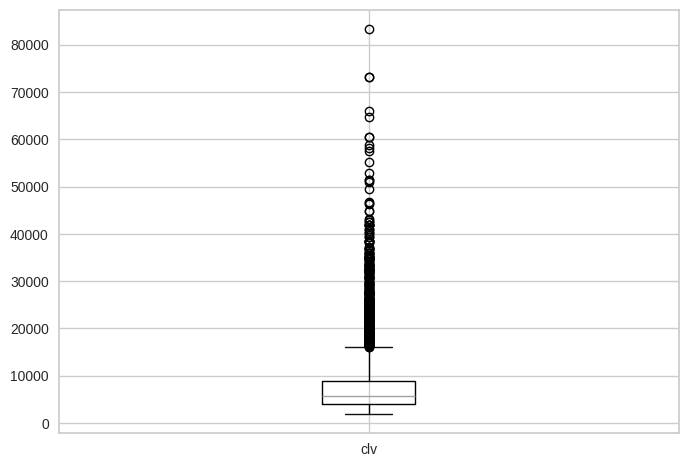

In [26]:
# box plot
loyalty_outlier[['clv']].boxplot()

The data with CLV outliers will not be used to further anaysis.

#### Salary Outlier Detection

In [27]:
# Calculating the IQR for a DataFrame
Q1 = loyalty_outlier['salary'].quantile(0.25)
Q3 = loyalty_outlier['salary'].quantile(0.75)
IQR = Q3 - Q1

print('Q1 : ',Q1)
print('Q3 : ',Q3)
print('IQR: ',IQR)

Q1 :  58453.0
Q3 :  87314.25
IQR:  28861.25


In [28]:
# Outlier detection
min_box = Q1 - 1.5*IQR
max_box = Q3 + 1.5*IQR

def update_min_box(min_box):
  if min_box < 0:
    min_box = 0

  return min_box

print(f"Batas bawah outlier = {update_min_box(min_box)}")
print(f"Batas atas outlier = {max_box:.3f}")

Batas bawah outlier = 15161.125
Batas atas outlier = 130606.125


In [29]:
# Outlier adalah yang amountnya di bawah "min" ATAU di atas "max"
salary_criteria1 = (loyalty_outlier['salary'] <= min_box)
salary_criteria2 = (loyalty_outlier['salary'] >= max_box)

loyalty_outlier[salary_criteria1 | salary_criteria2] # 191 row

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
62,461108,Canada,Quebec,Montreal,H2T 9K8,Male,Doctor,152955.0,Married,Star,3954.34,Standard,2018,10,NaN,NaN
194,410982,Canada,Ontario,Trenton,K8V 4B2,Male,Master,132353.0,Married,Star,4237.37,Standard,2017,2,NaN,NaN
279,202299,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Doctor,245427.0,Married,Star,4373.36,Standard,2017,3,NaN,NaN
467,370486,Canada,Ontario,Toronto,M2M 7K8,Female,Doctor,148510.0,Single,Star,4657.16,Standard,2017,7,NaN,NaN
578,671764,Canada,Quebec,Tremblant,H5Y 2S9,Male,Doctor,222764.0,Single,Nova,35850.60,2018 Promotion,2018,3,2018.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16508,988419,Canada,Saskatchewan,Regina,S6J 3G0,Female,Doctor,198691.0,Divorced,Star,2395.57,2018 Promotion,2018,3,2018.0,11.0
16545,898122,Canada,Saskatchewan,Regina,S6J 3G0,Female,Doctor,216901.0,Married,Star,4681.53,2018 Promotion,2018,3,NaN,NaN
16586,579424,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Doctor,254724.0,Married,Star,27564.74,Standard,2017,7,NaN,NaN
16645,265383,Canada,New Brunswick,Fredericton,E3B 2H2,Male,Doctor,245263.0,Married,Star,31803.31,Standard,2017,3,NaN,NaN


The data with outlier salaries will not be included to next analysis

In [30]:
loyalty_chg_data_type.shape

(5497, 16)

### Adding enrollment_date and cancellation_date columns

In [31]:
# first, copy the data frame
loyalty_enrollment_date = loyalty_chg_data_type.copy()
loyalty_enrollment_date.shape

(5497, 16)

In [32]:
# combine enrollment_year and enrollment_month column
# and then add new column with value date format 'yyyy-mm-dd'
loyalty_enrollment_date['enrollment_date'] = pd.to_datetime(loyalty_enrollment_date['enrollment_year'].astype(str) + '-' + loyalty_enrollment_date['enrollment_month'].astype(str) + '-01')
loyalty_enrollment_date

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date
12,611765,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018,1,NaN,NaN,2018-01-01
18,172755,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5303.76,2018 Promotion,2018,3,NaN,NaN,2018-03-01
21,552965,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Married,Star,3885.46,Standard,2018,11,NaN,NaN,2018-11-01
27,557752,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,98629.0,Married,Star,3890.87,Standard,2017,10,NaN,NaN,2017-10-01
32,403361,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,70222.0,Single,Star,3895.03,Standard,2017,10,NaN,NaN,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,351296,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,104990.0,Divorced,Star,39365.30,Standard,2017,5,NaN,NaN,2017-05-01
16712,753864,Canada,Alberta,Edmonton,T9G 1W3,Male,Bachelor,67460.0,Married,Star,40224.01,Standard,2018,7,NaN,NaN,2018-07-01
16716,670666,Canada,Ontario,Kingston,M9K 2P4,Male,Bachelor,65997.0,Divorced,Star,41787.90,Standard,2017,5,NaN,NaN,2017-05-01
16721,632951,Canada,Alberta,Edmonton,T9G 1W3,Female,College,NaN,Married,Star,44771.30,Standard,2018,7,NaN,NaN,2018-07-01


In [33]:
# first, copy the data frame
# this data frame is for cancellation_date new column
loyalty_cancellation_date = loyalty_enrollment_date.copy()
loyalty_cancellation_date.shape

(5497, 17)

In [34]:
loyalty_cancellation_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5497 entries, 12 to 16735
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loyalty_number      5497 non-null   object        
 1   country             5497 non-null   object        
 2   province            5497 non-null   object        
 3   city                5497 non-null   object        
 4   postal_code         5497 non-null   object        
 5   gender              5497 non-null   object        
 6   education           5497 non-null   object        
 7   salary              4104 non-null   float64       
 8   marital_status      5497 non-null   object        
 9   loyalty_card        5497 non-null   object        
 10  clv                 5497 non-null   float64       
 11  enrollment_type     5497 non-null   object        
 12  enrollment_year     5497 non-null   int64         
 13  enrollment_month    5497 non-null   int64         


In [35]:
# copy the cancellation_year and cancellation_month to a new columns
# the new columns for creating a new combined column named cancellation_date with datetime data type
loyalty_cancellation_date['cancellation_year_str'] = loyalty_cancellation_date['cancellation_year']
loyalty_cancellation_date['cancellation_month_str'] = loyalty_cancellation_date['cancellation_month']
loyalty_cancellation_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5497 entries, 12 to 16735
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loyalty_number          5497 non-null   object        
 1   country                 5497 non-null   object        
 2   province                5497 non-null   object        
 3   city                    5497 non-null   object        
 4   postal_code             5497 non-null   object        
 5   gender                  5497 non-null   object        
 6   education               5497 non-null   object        
 7   salary                  4104 non-null   float64       
 8   marital_status          5497 non-null   object        
 9   loyalty_card            5497 non-null   object        
 10  clv                     5497 non-null   float64       
 11  enrollment_type         5497 non-null   object        
 12  enrollment_year         5497 non-null   int64      

In [36]:
# Convert only float values to int, leave NaN as is
loyalty_cancellation_date['cancellation_year_str'] = loyalty_cancellation_date['cancellation_year_str'].apply(lambda x: int(x) if isinstance(x, float) and not pd.isna(x) else x)
loyalty_cancellation_date['cancellation_month_str'] = loyalty_cancellation_date['cancellation_month_str'].apply(lambda x: int(x) if isinstance(x, float) and not pd.isna(x) else x)

# Convert the entire column to integers, ignoring NaN
# fill the NaN cancellation_year with 2019 to prevent the error when convert it to datetime data type
# fill the NaN cancellation_month with 1, not 0, to prevent the error when convert it to datetime data type
loyalty_cancellation_date['cancellation_year_str'] = loyalty_cancellation_date['cancellation_year_str'].fillna(2019).astype(int)
loyalty_cancellation_date['cancellation_month_str'] = loyalty_cancellation_date['cancellation_month_str'].fillna(1).astype(int)

loyalty_cancellation_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5497 entries, 12 to 16735
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loyalty_number          5497 non-null   object        
 1   country                 5497 non-null   object        
 2   province                5497 non-null   object        
 3   city                    5497 non-null   object        
 4   postal_code             5497 non-null   object        
 5   gender                  5497 non-null   object        
 6   education               5497 non-null   object        
 7   salary                  4104 non-null   float64       
 8   marital_status          5497 non-null   object        
 9   loyalty_card            5497 non-null   object        
 10  clv                     5497 non-null   float64       
 11  enrollment_type         5497 non-null   object        
 12  enrollment_year         5497 non-null   int64      

In [37]:
# check the cancellation_year and cancellation_month values after changing the data types
loyalty_cancellation_date.head(5)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_year_str,cancellation_month_str
12,611765,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018,1,NaN,NaN,2018-01-01,2019,1
18,172755,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5303.76,2018 Promotion,2018,3,NaN,NaN,2018-03-01,2019,1
21,552965,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Married,Star,3885.46,Standard,2018,11,NaN,NaN,2018-11-01,2019,1
27,557752,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,98629.0,Married,Star,3890.87,Standard,2017,10,NaN,NaN,2017-10-01,2019,1
32,403361,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,70222.0,Single,Star,3895.03,Standard,2017,10,NaN,NaN,2017-10-01,2019,1


In [38]:
# Convert the cancellation_year and cancellation_month from int to str
loyalty_cancellation_date['cancellation_year_str'] = loyalty_cancellation_date['cancellation_year_str'].astype(str)
loyalty_cancellation_date['cancellation_month_str'] = loyalty_cancellation_date['cancellation_month_str'].astype(str)
loyalty_cancellation_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5497 entries, 12 to 16735
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loyalty_number          5497 non-null   object        
 1   country                 5497 non-null   object        
 2   province                5497 non-null   object        
 3   city                    5497 non-null   object        
 4   postal_code             5497 non-null   object        
 5   gender                  5497 non-null   object        
 6   education               5497 non-null   object        
 7   salary                  4104 non-null   float64       
 8   marital_status          5497 non-null   object        
 9   loyalty_card            5497 non-null   object        
 10  clv                     5497 non-null   float64       
 11  enrollment_type         5497 non-null   object        
 12  enrollment_year         5497 non-null   int64      

In [39]:
# Combine 'year' and 'month' columns and convert the data type to datetime format 'yyyy-mm-dd'
loyalty_cancellation_date['cancellation_date'] = pd.to_datetime(loyalty_cancellation_date['cancellation_year_str'] + '-' + loyalty_cancellation_date['cancellation_month_str'] + '-01')  # Adding '-01' as the default day
loyalty_cancellation_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5497 entries, 12 to 16735
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loyalty_number          5497 non-null   object        
 1   country                 5497 non-null   object        
 2   province                5497 non-null   object        
 3   city                    5497 non-null   object        
 4   postal_code             5497 non-null   object        
 5   gender                  5497 non-null   object        
 6   education               5497 non-null   object        
 7   salary                  4104 non-null   float64       
 8   marital_status          5497 non-null   object        
 9   loyalty_card            5497 non-null   object        
 10  clv                     5497 non-null   float64       
 11  enrollment_type         5497 non-null   object        
 12  enrollment_year         5497 non-null   int64      

In [40]:
loyalty_cancellation_date.head(5)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_year_str,cancellation_month_str,cancellation_date
12,611765,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018,1,NaN,NaN,2018-01-01,2019,1,2019-01-01
18,172755,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5303.76,2018 Promotion,2018,3,NaN,NaN,2018-03-01,2019,1,2019-01-01
21,552965,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Married,Star,3885.46,Standard,2018,11,NaN,NaN,2018-11-01,2019,1,2019-01-01
27,557752,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,98629.0,Married,Star,3890.87,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,2019-01-01
32,403361,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,70222.0,Single,Star,3895.03,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,2019-01-01


In [41]:
# Set the original null values of cancellation_year and cancellation_month (now '2019-01-01') to null values
loyalty_cancellation_date.loc[loyalty_cancellation_date['cancellation_date'] == '2019-01-01', 'cancellation_date'] = None
loyalty_cancellation_date.head(5)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_year_str,cancellation_month_str,cancellation_date
12,611765,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018,1,NaN,NaN,2018-01-01,2019,1,NaT
18,172755,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5303.76,2018 Promotion,2018,3,NaN,NaN,2018-03-01,2019,1,NaT
21,552965,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Married,Star,3885.46,Standard,2018,11,NaN,NaN,2018-11-01,2019,1,NaT
27,557752,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,98629.0,Married,Star,3890.87,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT
32,403361,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,70222.0,Single,Star,3895.03,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT


In [42]:
# reset the index
loyalty_reset_id = loyalty_cancellation_date.reset_index()

loyalty_reset_id = loyalty_reset_id.drop(['index'], axis=1)
loyalty_reset_id

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_year_str,cancellation_month_str,cancellation_date
0,611765,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018,1,NaN,NaN,2018-01-01,2019,1,NaT
1,172755,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5303.76,2018 Promotion,2018,3,NaN,NaN,2018-03-01,2019,1,NaT
2,552965,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Married,Star,3885.46,Standard,2018,11,NaN,NaN,2018-11-01,2019,1,NaT
3,557752,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,98629.0,Married,Star,3890.87,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT
4,403361,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,70222.0,Single,Star,3895.03,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,351296,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,104990.0,Divorced,Star,39365.30,Standard,2017,5,NaN,NaN,2017-05-01,2019,1,NaT
5493,753864,Canada,Alberta,Edmonton,T9G 1W3,Male,Bachelor,67460.0,Married,Star,40224.01,Standard,2018,7,NaN,NaN,2018-07-01,2019,1,NaT
5494,670666,Canada,Ontario,Kingston,M9K 2P4,Male,Bachelor,65997.0,Divorced,Star,41787.90,Standard,2017,5,NaN,NaN,2017-05-01,2019,1,NaT
5495,632951,Canada,Alberta,Edmonton,T9G 1W3,Female,College,NaN,Married,Star,44771.30,Standard,2018,7,NaN,NaN,2018-07-01,2019,1,NaT


In [43]:
loyalty_reset_id.shape

(5497, 20)

## Select Data

The cleaned data will have:
- no negative salaries
- no NaN salaries
- no CLV outliers
- no salary outliers

In [44]:
loyalty_with_invalid_salary = loyalty_reset_id.copy()
loyalty_with_invalid_salary

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_year_str,cancellation_month_str,cancellation_date
0,611765,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018,1,NaN,NaN,2018-01-01,2019,1,NaT
1,172755,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5303.76,2018 Promotion,2018,3,NaN,NaN,2018-03-01,2019,1,NaT
2,552965,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Married,Star,3885.46,Standard,2018,11,NaN,NaN,2018-11-01,2019,1,NaT
3,557752,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,98629.0,Married,Star,3890.87,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT
4,403361,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,70222.0,Single,Star,3895.03,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,351296,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,104990.0,Divorced,Star,39365.30,Standard,2017,5,NaN,NaN,2017-05-01,2019,1,NaT
5493,753864,Canada,Alberta,Edmonton,T9G 1W3,Male,Bachelor,67460.0,Married,Star,40224.01,Standard,2018,7,NaN,NaN,2018-07-01,2019,1,NaT
5494,670666,Canada,Ontario,Kingston,M9K 2P4,Male,Bachelor,65997.0,Divorced,Star,41787.90,Standard,2017,5,NaN,NaN,2017-05-01,2019,1,NaT
5495,632951,Canada,Alberta,Edmonton,T9G 1W3,Female,College,NaN,Married,Star,44771.30,Standard,2018,7,NaN,NaN,2018-07-01,2019,1,NaT


In [45]:
#1. get the data frame for customers with negative or empty salary from loyalty_cancellation_date dataset (1st dataset)
cust_with_invalid_salary = loyalty_with_invalid_salary[loyalty_with_invalid_salary['salary'].isnull() | (loyalty_with_invalid_salary['salary'] < 0)]
cust_with_invalid_salary

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_year_str,cancellation_month_str,cancellation_date
1,172755,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5303.76,2018 Promotion,2018,3,NaN,NaN,2018-03-01,2019,1,NaT
2,552965,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Married,Star,3885.46,Standard,2018,11,NaN,NaN,2018-11-01,2019,1,NaT
7,938981,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5337.35,2018 Promotion,2018,4,NaN,NaN,2018-04-01,2019,1,NaT
18,529098,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Divorced,Star,3974.86,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT
21,789157,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Single,Star,3995.36,Standard,2018,9,NaN,NaN,2018-09-01,2019,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5482,544301,Canada,Ontario,Toronto,P1J 8T7,Female,College,NaN,Divorced,Star,34708.87,Standard,2017,7,NaN,NaN,2017-07-01,2019,1,NaT
5489,235683,Canada,Quebec,Quebec City,G1B 3L5,Female,College,NaN,Married,Star,38055.21,Standard,2017,8,NaN,NaN,2017-08-01,2019,1,NaT
5491,409984,Canada,Yukon,Whitehorse,Y2K 6R0,Male,College,NaN,Single,Star,7452.23,2018 Promotion,2018,4,2018.0,12.0,2018-04-01,2018,12,2018-12-01
5495,632951,Canada,Alberta,Edmonton,T9G 1W3,Female,College,NaN,Married,Star,44771.30,Standard,2018,7,NaN,NaN,2018-07-01,2019,1,NaT


In [46]:
# 2nd: get a list of loyalty_number to exclude
exclude_loyalty_number = cust_with_invalid_salary['loyalty_number'].unique()
len(exclude_loyalty_number)

1413

In [47]:
# 3rd: exclude those customers in exclude_loyalty_number list from the activity dataset
loyalty_salary_cleaned = loyalty_cancellation_date[~loyalty_cancellation_date['loyalty_number'].isin(exclude_loyalty_number)]
loyalty_salary_cleaned

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_year_str,cancellation_month_str,cancellation_date
12,611765,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018,1,NaN,NaN,2018-01-01,2019,1,NaT
27,557752,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,98629.0,Married,Star,3890.87,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT
32,403361,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,70222.0,Single,Star,3895.03,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT
34,806030,Canada,Alberta,Calgary,T3E 2V9,Female,Bachelor,75861.0,Married,Star,3903.47,Standard,2018,5,NaN,NaN,2018-05-01,2019,1,NaT
35,119200,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,69835.0,Divorced,Star,3903.80,Standard,2017,5,NaN,NaN,2017-05-01,2019,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16698,909547,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,54567.0,Married,Star,5759.01,2018 Promotion,2018,4,NaN,NaN,2018-04-01,2019,1,NaT
16703,247433,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,90682.0,Married,Star,38230.21,Standard,2017,5,NaN,NaN,2017-05-01,2019,1,NaT
16709,351296,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,104990.0,Divorced,Star,39365.30,Standard,2017,5,NaN,NaN,2017-05-01,2019,1,NaT
16712,753864,Canada,Alberta,Edmonton,T9G 1W3,Male,Bachelor,67460.0,Married,Star,40224.01,Standard,2018,7,NaN,NaN,2018-07-01,2019,1,NaT


In [48]:
# 4th: exclude those customers in exclude_loyalty_number2 list from the activity dataset
salary_outliers = loyalty_outlier[salary_criteria1 | salary_criteria2]
#salary_outliers.shape

# get a list of loyalty_number to exclude
exclude_loyalty_number2 = salary_outliers['loyalty_number'].unique()
#len(exclude_loyalty_number2)

# exclude those customers in exclude_loyalty_number2 list from the loyalty dataset
loyalty_salary_no_outliers = loyalty_salary_cleaned[~loyalty_salary_cleaned['loyalty_number'].isin(exclude_loyalty_number2)]
loyalty_salary_no_outliers

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_year_str,cancellation_month_str,cancellation_date
12,611765,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018,1,NaN,NaN,2018-01-01,2019,1,NaT
27,557752,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,98629.0,Married,Star,3890.87,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT
32,403361,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,70222.0,Single,Star,3895.03,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT
34,806030,Canada,Alberta,Calgary,T3E 2V9,Female,Bachelor,75861.0,Married,Star,3903.47,Standard,2018,5,NaN,NaN,2018-05-01,2019,1,NaT
35,119200,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,69835.0,Divorced,Star,3903.80,Standard,2017,5,NaN,NaN,2017-05-01,2019,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16698,909547,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,54567.0,Married,Star,5759.01,2018 Promotion,2018,4,NaN,NaN,2018-04-01,2019,1,NaT
16703,247433,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,90682.0,Married,Star,38230.21,Standard,2017,5,NaN,NaN,2017-05-01,2019,1,NaT
16709,351296,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,104990.0,Divorced,Star,39365.30,Standard,2017,5,NaN,NaN,2017-05-01,2019,1,NaT
16712,753864,Canada,Alberta,Edmonton,T9G 1W3,Male,Bachelor,67460.0,Married,Star,40224.01,Standard,2018,7,NaN,NaN,2018-07-01,2019,1,NaT


In [49]:
# 5th: exclude those customers in exclude_loyalty_number3 list from the activity dataset
clv_outliers = loyalty_outlier[clv_criteria1 | clv_criteria2]

# get a list of loyalty_number to exclude
exclude_loyalty_number3 = clv_outliers['loyalty_number'].unique()

# exclude those customers in exclude_loyalty_number2 list from the loyalty dataset
loyalty_clv_no_outliers = loyalty_salary_no_outliers[~loyalty_salary_no_outliers['loyalty_number'].isin(exclude_loyalty_number3)]
loyalty_clv_no_outliers

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_year_str,cancellation_month_str,cancellation_date
12,611765,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018,1,NaN,NaN,2018-01-01,2019,1,NaT
27,557752,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,98629.0,Married,Star,3890.87,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT
32,403361,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,70222.0,Single,Star,3895.03,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT
34,806030,Canada,Alberta,Calgary,T3E 2V9,Female,Bachelor,75861.0,Married,Star,3903.47,Standard,2018,5,NaN,NaN,2018-05-01,2019,1,NaT
35,119200,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,69835.0,Divorced,Star,3903.80,Standard,2017,5,NaN,NaN,2017-05-01,2019,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16635,389583,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,59220.0,Divorced,Nova,5283.36,2018 Promotion,2018,3,NaN,NaN,2018-03-01,2019,1,NaT
16655,847601,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,82383.0,Divorced,Nova,7736.65,2018 Promotion,2018,3,NaN,NaN,2018-03-01,2019,1,NaT
16673,368435,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,73695.0,Married,Nova,8707.62,2018 Promotion,2018,4,2018.0,12.0,2018-04-01,2018,12,2018-12-01
16676,828109,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,74049.0,Divorced,Nova,13009.24,2018 Promotion,2018,3,2018.0,11.0,2018-03-01,2018,11,2018-11-01


In [50]:
# additional checking for year 2012
loyalty_clv_no_outliers['enrollment_date'].describe()

,enrollment_date
count,3550
mean,2017-12-29 23:51:04.563380224
min,2017-01-01 00:00:00
25%,2017-07-01 00:00:00
50%,2018-02-01 00:00:00
75%,2018-06-01 00:00:00
max,2018-12-01 00:00:00


In [51]:
# add membership_duration_month column
from datetime import datetime

loyalty_duration = loyalty_clv_no_outliers.copy()

# add membership_duration_month column
# Define the latest date (January 1, 2019)
latest_date = datetime(2019, 1, 1)

# Calculate membership duration in months
loyalty_duration['active_membership_duration_months'] = loyalty_duration.apply(
    lambda row: ((latest_date.year - row['enrollment_date'].year) * 12 +
                 (latest_date.month - row['enrollment_date'].month))
                 if pd.isna(row['cancellation_date']) else None,
    axis=1
)

loyalty_duration

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,...,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_year_str,cancellation_month_str,cancellation_date,active_membership_duration_months
12,611765,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,90175.0,Single,Star,...,Standard,2018,1,NaN,NaN,2018-01-01,2019,1,NaT,12.0
27,557752,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,98629.0,Married,Star,...,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT,15.0
32,403361,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,70222.0,Single,Star,...,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT,15.0
34,806030,Canada,Alberta,Calgary,T3E 2V9,Female,Bachelor,75861.0,Married,Star,...,Standard,2018,5,NaN,NaN,2018-05-01,2019,1,NaT,8.0
35,119200,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,69835.0,Divorced,Star,...,Standard,2017,5,NaN,NaN,2017-05-01,2019,1,NaT,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16635,389583,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,59220.0,Divorced,Nova,...,2018 Promotion,2018,3,NaN,NaN,2018-03-01,2019,1,NaT,10.0
16655,847601,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,82383.0,Divorced,Nova,...,2018 Promotion,2018,3,NaN,NaN,2018-03-01,2019,1,NaT,10.0
16673,368435,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,73695.0,Married,Nova,...,2018 Promotion,2018,4,2018.0,12.0,2018-04-01,2018,12,2018-12-01,NaN
16676,828109,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,74049.0,Divorced,Nova,...,2018 Promotion,2018,3,2018.0,11.0,2018-03-01,2018,11,2018-11-01,NaN


In [52]:
# reset the index
loyalty_reset_id = loyalty_duration.reset_index()

loyalty_reset_id = loyalty_reset_id.drop(['index'], axis=1)
loyalty_reset_id

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,...,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_year_str,cancellation_month_str,cancellation_date,active_membership_duration_months
0,611765,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,90175.0,Single,Star,...,Standard,2018,1,NaN,NaN,2018-01-01,2019,1,NaT,12.0
1,557752,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,98629.0,Married,Star,...,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT,15.0
2,403361,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,70222.0,Single,Star,...,Standard,2017,10,NaN,NaN,2017-10-01,2019,1,NaT,15.0
3,806030,Canada,Alberta,Calgary,T3E 2V9,Female,Bachelor,75861.0,Married,Star,...,Standard,2018,5,NaN,NaN,2018-05-01,2019,1,NaT,8.0
4,119200,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,69835.0,Divorced,Star,...,Standard,2017,5,NaN,NaN,2017-05-01,2019,1,NaT,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,389583,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,59220.0,Divorced,Nova,...,2018 Promotion,2018,3,NaN,NaN,2018-03-01,2019,1,NaT,10.0
3546,847601,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,82383.0,Divorced,Nova,...,2018 Promotion,2018,3,NaN,NaN,2018-03-01,2019,1,NaT,10.0
3547,368435,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,73695.0,Married,Nova,...,2018 Promotion,2018,4,2018.0,12.0,2018-04-01,2018,12,2018-12-01,NaN
3548,828109,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,74049.0,Divorced,Nova,...,2018 Promotion,2018,3,2018.0,11.0,2018-03-01,2018,11,2018-11-01,NaN


In [53]:
df_loyalty = loyalty_reset_id[['loyalty_number','country','province','city','gender',
                              'education','salary','marital_status','loyalty_card',
                              'clv','enrollment_type','enrollment_date','cancellation_date','active_membership_duration_months']]
df_loyalty

,loyalty_number,country,province,city,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_date,cancellation_date,active_membership_duration_months
0,611765,Canada,Quebec,Quebec City,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018-01-01,NaT,12.0
1,557752,Canada,Ontario,Toronto,Female,Bachelor,98629.0,Married,Star,3890.87,Standard,2017-10-01,NaT,15.0
2,403361,Canada,British Columbia,Vancouver,Male,Bachelor,70222.0,Single,Star,3895.03,Standard,2017-10-01,NaT,15.0
3,806030,Canada,Alberta,Calgary,Female,Bachelor,75861.0,Married,Star,3903.47,Standard,2018-05-01,NaT,8.0
4,119200,Canada,British Columbia,Vancouver,Female,Bachelor,69835.0,Divorced,Star,3903.80,Standard,2017-05-01,NaT,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,389583,Canada,Yukon,Whitehorse,Female,Bachelor,59220.0,Divorced,Nova,5283.36,2018 Promotion,2018-03-01,NaT,10.0
3546,847601,Canada,Yukon,Whitehorse,Male,Bachelor,82383.0,Divorced,Nova,7736.65,2018 Promotion,2018-03-01,NaT,10.0
3547,368435,Canada,Yukon,Whitehorse,Female,Bachelor,73695.0,Married,Nova,8707.62,2018 Promotion,2018-04-01,2018-12-01,NaN
3548,828109,Canada,Yukon,Whitehorse,Female,Bachelor,74049.0,Divorced,Nova,13009.24,2018 Promotion,2018-03-01,2018-11-01,NaN


In [54]:
# export the data frame into a csv file
df_loyalty.to_csv('df_loyalty.csv')

# 2nd dataset: customer_flight_activity.csv

In [55]:
activity = pd.read_csv("/content/customer_flight_activity.csv")

In [56]:
activity.shape

(405624, 10)

## Renaming Columns

In [57]:
for col in activity.columns:
    activity.rename(columns={col:col.lower().replace(" ","_")},inplace=True)

activity

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [58]:
activity.head(5)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


## Check Each Column

In [59]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   year                         405624 non-null  int64  
 2   month                        405624 non-null  int64  
 3   flights_booked               405624 non-null  int64  
 4   flights_with_companions      405624 non-null  int64  
 5   total_flights                405624 non-null  int64  
 6   distance                     405624 non-null  int64  
 7   points_accumulated           405624 non-null  float64
 8   points_redeemed              405624 non-null  int64  
 9   dollar_cost_points_redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [60]:
activity

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


Exclude members who enrolled in 2012 - 2016

In [61]:
# get the data frame for members who enrolled in 2017 to 2018
# then only include those who have loyalty_number value in those list
loyalty_2017_2018 = df_loyalty.copy()

In [62]:
loyalty_2017_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   loyalty_number                     3550 non-null   object        
 1   country                            3550 non-null   object        
 2   province                           3550 non-null   object        
 3   city                               3550 non-null   object        
 4   gender                             3550 non-null   object        
 5   education                          3550 non-null   object        
 6   salary                             3550 non-null   float64       
 7   marital_status                     3550 non-null   object        
 8   loyalty_card                       3550 non-null   object        
 9   clv                                3550 non-null   float64       
 10  enrollment_type                    3

In [63]:
loyalty_2017_2018['loyalty_number'] = loyalty_2017_2018['loyalty_number'].astype(int)
loyalty_2017_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   loyalty_number                     3550 non-null   int64         
 1   country                            3550 non-null   object        
 2   province                           3550 non-null   object        
 3   city                               3550 non-null   object        
 4   gender                             3550 non-null   object        
 5   education                          3550 non-null   object        
 6   salary                             3550 non-null   float64       
 7   marital_status                     3550 non-null   object        
 8   loyalty_card                       3550 non-null   object        
 9   clv                                3550 non-null   float64       
 10  enrollment_type                    3

In [64]:
# 2nd: get a list of loyalty_number to exclude
get_loyalty_number = loyalty_2017_2018['loyalty_number'].unique()
get_loyalty_number

array([611765, 557752, 403361, ..., 368435, 828109, 909547])

In [65]:
# 3rd: exclude those customers in exclude_2012_2016 list from the activity dataset
activity_2017_2018 = activity[activity['loyalty_number'].isin(get_loyalty_number)]
activity_2017_2018

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
9,100504,2017,1,0,0,0,0,0.0,0,0
29,101540,2017,1,0,0,0,0,0.0,0,0
34,101644,2017,1,0,0,0,0,0.0,0,0
37,100504,2017,2,0,0,0,0,0.0,0,0
38,101768,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405596,998192,2018,12,0,0,0,0,0.0,0,0
405597,998465,2018,12,5,5,10,2330,233.0,0,0
405598,998507,2018,12,11,0,11,3674,367.0,0,0
405609,999498,2018,12,17,0,17,2754,275.0,0,0


## Unique Values

In [66]:
# check the unique values for each column

for column_name in activity_2017_2018:
  print(activity[column_name].value_counts(), "\n")

loyalty_number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64 

year
2017    202812
2018    202812
Name: count, dtype: int64 

month
1     33802
9     33802
2     33802
3     33802
11    33802
4     33802
5     33802
7     33802
6     33802
8     33802
10    33802
12    33802
Name: count, dtype: int64 

flights_booked
0     197992
3      18228
11     15705
5      15084
7      14561
8      14357
9      14164
6      13847
2      13641
10     13363
4      12821
1      12667
13     10782
12     10382
14      7057
15      6582
16      4354
17      3899
18      2958
19      1496
20      1156
21       528
Name: count, dtype: int64 

flights_with_companions
0     296887
2      19272
3      19015
1      17905
4      13665
5      13424
6       9911
7       7089
8       3965
9       2944
10      1071
11       476
Name: count, dtype: int64 

total_flights
0     1

## Data Cleaning and Preparation

### Irrelevant Data

In [67]:
# At previous step, there is an irrevelant data found at salary column, where its value is negatif

activity_irrelevant = activity_2017_2018[activity_2017_2018['total_flights'] < 0]
activity_irrelevant

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed


So far, not found. Every data is good

### Handling Missing Value

In [68]:
activity_2017_2018.isnull().sum() # no missing value

,0
loyalty_number,0
year,0
month,0
flights_booked,0
flights_with_companions,0
total_flights,0
distance,0
points_accumulated,0
points_redeemed,0
dollar_cost_points_redeemed,0


So far, not found. No missing value

### Delete Duplicate Data

In [69]:
# check the duplicated data
check_dup = activity_2017_2018[activity_2017_2018.duplicated()]
check_dup

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
2026,208241,2017,1,0,0,0,0,0.0,0,0
2537,237094,2017,1,0,0,0,0,0.0,0,0
3889,308480,2017,1,0,0,0,0,0.0,0,0
4137,322169,2017,1,0,0,0,0,0.0,0,0
4827,357901,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
395376,455758,2018,12,0,0,0,0,0.0,0,0
397087,546259,2018,12,0,0,0,0,0.0,0,0
399011,646756,2018,12,0,0,0,0,0.0,0,0
401745,790940,2018,12,0,0,0,0,0.0,0,0


In [70]:
check_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 2026 to 402687
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loyalty_number               468 non-null    int64  
 1   year                         468 non-null    int64  
 2   month                        468 non-null    int64  
 3   flights_booked               468 non-null    int64  
 4   flights_with_companions      468 non-null    int64  
 5   total_flights                468 non-null    int64  
 6   distance                     468 non-null    int64  
 7   points_accumulated           468 non-null    float64
 8   points_redeemed              468 non-null    int64  
 9   dollar_cost_points_redeemed  468 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 40.2 KB


In [71]:
# check the unique values for each column

for column_name in check_dup:
  print(check_dup[column_name].value_counts(), "\n")

loyalty_number
546259    24
556755    24
369638    24
407404    24
790940    24
646756    24
746226    23
308480    23
841296    23
831341    23
208241    22
774168    19
470998    18
833793    18
455758    18
357901    17
654433    17
951353    16
732304    16
584833    12
979115    11
402697    11
958491    10
920175     6
322169     6
642020     5
237094     5
738567     3
336882     1
512296     1
Name: count, dtype: int64 

year
2017    279
2018    189
Name: count, dtype: int64 

month
2     44
3     44
1     43
4     43
8     41
5     40
6     39
9     39
7     37
10    36
11    35
12    27
Name: count, dtype: int64 

flights_booked
0    468
Name: count, dtype: int64 

flights_with_companions
0    468
Name: count, dtype: int64 

total_flights
0    468
Name: count, dtype: int64 

distance
0    468
Name: count, dtype: int64 

points_accumulated
0.0    468
Name: count, dtype: int64 

points_redeemed
0    468
Name: count, dtype: int64 

dollar_cost_points_redeemed
0    468
Name: coun

Insights:
- There are 468 duplicated rows (0.54%)
- All the duplicated rows are having flight_booked = 0

To decide whether to keep or delete the duplicate data, I check them first. I chose two clients and check their duplicate data.

When I look at this duplicate data, their indices are always after the data they're duplicating

First check duplication for customer with loyalty number = 546259

In [72]:
# checking duplication for customer with loyalty number = 546259
# important to remember that flights_booked = 0
check_dup[check_dup['loyalty_number'] == 546259]

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
8364,546259,2017,1,0,0,0,0,0.0,0,0
25265,546259,2017,2,0,0,0,0,0.0,0,0
42166,546259,2017,3,0,0,0,0,0.0,0,0
59067,546259,2017,4,0,0,0,0,0.0,0,0
75968,546259,2017,5,0,0,0,0,0.0,0,0
92869,546259,2017,6,0,0,0,0,0.0,0,0
109770,546259,2017,7,0,0,0,0,0.0,0,0
126671,546259,2017,8,0,0,0,0,0.0,0,0
143572,546259,2017,9,0,0,0,0,0.0,0,0
160473,546259,2017,10,0,0,0,0,0.0,0,0


From this picture, we could confirm the assumption i.e., their indices are always after the data they're duplicating

![](https://drive.google.com/uc?export=view&id=1RQC_SBzFndwrKMwL6G6IuwFgjxwT6yuw)

From above checking, we could proceed to delete the duplicate data

In [73]:
# remove duplicated rows
activity_no_duplicate = activity_2017_2018.drop_duplicates()
activity_no_duplicate

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
9,100504,2017,1,0,0,0,0,0.0,0,0
29,101540,2017,1,0,0,0,0,0.0,0,0
34,101644,2017,1,0,0,0,0,0.0,0,0
37,100504,2017,2,0,0,0,0,0.0,0,0
38,101768,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405596,998192,2018,12,0,0,0,0,0.0,0,0
405597,998465,2018,12,5,5,10,2330,233.0,0,0
405598,998507,2018,12,11,0,11,3674,367.0,0,0
405609,999498,2018,12,17,0,17,2754,275.0,0,0


### Change Data Type

In [74]:
activity_no_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85452 entries, 9 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loyalty_number               85452 non-null  int64  
 1   year                         85452 non-null  int64  
 2   month                        85452 non-null  int64  
 3   flights_booked               85452 non-null  int64  
 4   flights_with_companions      85452 non-null  int64  
 5   total_flights                85452 non-null  int64  
 6   distance                     85452 non-null  int64  
 7   points_accumulated           85452 non-null  float64
 8   points_redeemed              85452 non-null  int64  
 9   dollar_cost_points_redeemed  85452 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 7.2 MB


In [75]:
# change data type for loyalty_number
activity_no_duplicate["loyalty_number"] = activity_no_duplicate[["loyalty_number"]].astype(str)
activity_no_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85452 entries, 9 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loyalty_number               85452 non-null  object 
 1   year                         85452 non-null  int64  
 2   month                        85452 non-null  int64  
 3   flights_booked               85452 non-null  int64  
 4   flights_with_companions      85452 non-null  int64  
 5   total_flights                85452 non-null  int64  
 6   distance                     85452 non-null  int64  
 7   points_accumulated           85452 non-null  float64
 8   points_redeemed              85452 non-null  int64  
 9   dollar_cost_points_redeemed  85452 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 7.2+ MB


<ipython-input-75-844c9a209c3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_no_duplicate["loyalty_number"] = activity_no_duplicate[["loyalty_number"]].astype(str)


### Summary of Data Cleaning

In [76]:
# Define the data for the table
data = {
    "Steps": [
        "Remove Irrelevant Data",
        "Handle Missing Value",
        "Handle Duplicate Data",
        "Convert Data Type"
        ],
    "Original Data": [
        "405,624", "int64", "int64", "int64"],
    "After Cleaning": ["string", "-", "-", "85,452"],
  }

# Create a DataFrame
df = pd.DataFrame(data)

# Style the DataFrame with borders
styled_df = df.style.set_table_styles(
    [
        {'selector': 'table', 'props': [('border-collapse', 'collapse')]},
        {'selector': 'th, td', 'props': [('border', '1px solid black'), ('padding', '8px')]}
    ]
)

# Display the styled table in Google Colab
styled_df

,Steps,Original Data,After Cleaning
0,Remove Irrelevant Data,"405,624",string
1,Handle Missing Value,int64,-
2,Handle Duplicate Data,int64,-
3,Convert Data Type,int64,"85,452"


In [77]:
activity_chgd_data_type = activity_no_duplicate.copy()
activity_chgd_data_type.shape

(85452, 10)

In [78]:
activity_chgd_data_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85452 entries, 9 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loyalty_number               85452 non-null  object 
 1   year                         85452 non-null  int64  
 2   month                        85452 non-null  int64  
 3   flights_booked               85452 non-null  int64  
 4   flights_with_companions      85452 non-null  int64  
 5   total_flights                85452 non-null  int64  
 6   distance                     85452 non-null  int64  
 7   points_accumulated           85452 non-null  float64
 8   points_redeemed              85452 non-null  int64  
 9   dollar_cost_points_redeemed  85452 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 7.2+ MB


In [79]:
activity_temp = activity_chgd_data_type.copy()
activity_temp.shape

(85452, 10)

In [80]:
# reset the index
activity_reset_id = activity_temp.reset_index()

activity_reset_id = activity_reset_id.drop(['index'], axis=1)
activity_reset_id

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100504,2017,1,0,0,0,0,0.0,0,0
1,101540,2017,1,0,0,0,0,0.0,0,0
2,101644,2017,1,0,0,0,0,0.0,0,0
3,100504,2017,2,0,0,0,0,0.0,0,0
4,101768,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
85447,998192,2018,12,0,0,0,0,0.0,0,0
85448,998465,2018,12,5,5,10,2330,233.0,0,0
85449,998507,2018,12,11,0,11,3674,367.0,0,0
85450,999498,2018,12,17,0,17,2754,275.0,0,0


In [81]:
# combine year and month column
# and then add new column with value date format 'yyyy-mm-dd'
activity_temp_w_flight_date = activity_reset_id.copy()

activity_temp_w_flight_date['flight_date'] = pd.to_datetime(activity_temp_w_flight_date['year'].astype(str) + '-' + activity_temp_w_flight_date['month'].astype(str) + '-01')
activity_temp_w_flight_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85452 entries, 0 to 85451
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   loyalty_number               85452 non-null  object        
 1   year                         85452 non-null  int64         
 2   month                        85452 non-null  int64         
 3   flights_booked               85452 non-null  int64         
 4   flights_with_companions      85452 non-null  int64         
 5   total_flights                85452 non-null  int64         
 6   distance                     85452 non-null  int64         
 7   points_accumulated           85452 non-null  float64       
 8   points_redeemed              85452 non-null  int64         
 9   dollar_cost_points_redeemed  85452 non-null  int64         
 10  flight_date                  85452 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(8

In [82]:
df_activity = activity_temp_w_flight_date.copy()
df_activity.to_csv('df_activity.csv')

# Summarize Flight History per Customer

In [83]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85452 entries, 0 to 85451
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   loyalty_number               85452 non-null  object        
 1   year                         85452 non-null  int64         
 2   month                        85452 non-null  int64         
 3   flights_booked               85452 non-null  int64         
 4   flights_with_companions      85452 non-null  int64         
 5   total_flights                85452 non-null  int64         
 6   distance                     85452 non-null  int64         
 7   points_accumulated           85452 non-null  float64       
 8   points_redeemed              85452 non-null  int64         
 9   dollar_cost_points_redeemed  85452 non-null  int64         
 10  flight_date                  85452 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(8

In [84]:
# group by customers based on their flight activity
customer_flight_history = df_activity.drop(columns=['year', 'month','flight_date'])

customer_flight_history = customer_flight_history.groupby('loyalty_number', as_index=False).sum()
customer_flight_history

,loyalty_number,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100504,67,6,73,15911,1709.00,0,0
1,101540,106,23,129,29525,2969.52,931,75
2,101644,6,0,6,2628,262.00,0,0
3,101768,6,6,12,2104,210.00,0,0
4,102168,83,17,100,21933,2251.00,0,0
...,...,...,...,...,...,...,...,...
3545,998465,102,28,130,31584,3195.72,0,0
3546,998507,119,21,140,38388,3884.00,794,65
3547,999498,134,30,164,38697,3964.50,2908,236
3548,999788,42,16,58,15784,1575.00,361,29


In [85]:
customer_flight_history.to_csv('customer_flight_history.csv')

# Merging Dataset



## First Merging: members and their flight histories

- 1st dataset: df_loyalty
- 2nd dataset: df_activity

Result: customer loyalty data and their flight history

In [86]:
df_loyalty.shape

(3550, 14)

In [87]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   loyalty_number                     3550 non-null   object        
 1   country                            3550 non-null   object        
 2   province                           3550 non-null   object        
 3   city                               3550 non-null   object        
 4   gender                             3550 non-null   object        
 5   education                          3550 non-null   object        
 6   salary                             3550 non-null   float64       
 7   marital_status                     3550 non-null   object        
 8   loyalty_card                       3550 non-null   object        
 9   clv                                3550 non-null   float64       
 10  enrollment_type                    3

In [88]:
df_activity.shape

(85452, 11)

In [89]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85452 entries, 0 to 85451
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   loyalty_number               85452 non-null  object        
 1   year                         85452 non-null  int64         
 2   month                        85452 non-null  int64         
 3   flights_booked               85452 non-null  int64         
 4   flights_with_companions      85452 non-null  int64         
 5   total_flights                85452 non-null  int64         
 6   distance                     85452 non-null  int64         
 7   points_accumulated           85452 non-null  float64       
 8   points_redeemed              85452 non-null  int64         
 9   dollar_cost_points_redeemed  85452 non-null  int64         
 10  flight_date                  85452 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(8

In [90]:
df_merge_flight_list = pd.merge(df_loyalty, df_activity, how='left', on='loyalty_number')
df_merge_flight_list.shape

(85452, 24)

In [91]:
df_merge_flight_list

,loyalty_number,country,province,city,gender,education,salary,marital_status,loyalty_card,clv,...,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,flight_date
0,611765,Canada,Quebec,Quebec City,Male,Bachelor,90175.0,Single,Star,3867.97,...,2017,1,0,0,0,0,0.0,0,0,2017-01-01
1,611765,Canada,Quebec,Quebec City,Male,Bachelor,90175.0,Single,Star,3867.97,...,2017,2,0,0,0,0,0.0,0,0,2017-02-01
2,611765,Canada,Quebec,Quebec City,Male,Bachelor,90175.0,Single,Star,3867.97,...,2017,3,0,0,0,0,0.0,0,0,2017-03-01
3,611765,Canada,Quebec,Quebec City,Male,Bachelor,90175.0,Single,Star,3867.97,...,2017,4,0,0,0,0,0.0,0,0,2017-04-01
4,611765,Canada,Quebec,Quebec City,Male,Bachelor,90175.0,Single,Star,3867.97,...,2017,5,0,0,0,0,0.0,0,0,2017-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85447,909547,Canada,Yukon,Whitehorse,Female,Bachelor,54567.0,Married,Star,5759.01,...,2018,8,17,0,17,4709,470.0,0,0,2018-08-01
85448,909547,Canada,Yukon,Whitehorse,Female,Bachelor,54567.0,Married,Star,5759.01,...,2018,9,6,0,6,1080,108.0,0,0,2018-09-01
85449,909547,Canada,Yukon,Whitehorse,Female,Bachelor,54567.0,Married,Star,5759.01,...,2018,10,6,6,12,936,93.0,0,0,2018-10-01
85450,909547,Canada,Yukon,Whitehorse,Female,Bachelor,54567.0,Married,Star,5759.01,...,2018,11,0,0,0,0,0.0,0,0,2018-11-01


In [92]:
df_merge_flight_list.to_csv('df_merge_flight_list.csv')

## Second Merging: members and their flight summary

In [93]:
customer_flight_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loyalty_number               3550 non-null   object 
 1   flights_booked               3550 non-null   int64  
 2   flights_with_companions      3550 non-null   int64  
 3   total_flights                3550 non-null   int64  
 4   distance                     3550 non-null   int64  
 5   points_accumulated           3550 non-null   float64
 6   points_redeemed              3550 non-null   int64  
 7   dollar_cost_points_redeemed  3550 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 222.0+ KB


In [94]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   loyalty_number                     3550 non-null   object        
 1   country                            3550 non-null   object        
 2   province                           3550 non-null   object        
 3   city                               3550 non-null   object        
 4   gender                             3550 non-null   object        
 5   education                          3550 non-null   object        
 6   salary                             3550 non-null   float64       
 7   marital_status                     3550 non-null   object        
 8   loyalty_card                       3550 non-null   object        
 9   clv                                3550 non-null   float64       
 10  enrollment_type                    3

In [95]:
df_merge_members_summary = pd.merge(df_loyalty, customer_flight_history, how='left', on='loyalty_number')
df_merge_members_summary.shape

(3550, 21)

In [96]:
df_merge_members_summary

,loyalty_number,country,province,city,gender,education,salary,marital_status,loyalty_card,clv,...,enrollment_date,cancellation_date,active_membership_duration_months,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,611765,Canada,Quebec,Quebec City,Male,Bachelor,90175.0,Single,Star,3867.97,...,2018-01-01,NaT,12.0,86,22,108,25268,2572.84,436,35
1,557752,Canada,Ontario,Toronto,Female,Bachelor,98629.0,Married,Star,3890.87,...,2017-10-01,NaT,15.0,79,27,106,28031,2862.36,1340,108
2,403361,Canada,British Columbia,Vancouver,Male,Bachelor,70222.0,Single,Star,3895.03,...,2017-10-01,NaT,15.0,68,18,86,23117,2354.88,0,0
3,806030,Canada,Alberta,Calgary,Female,Bachelor,75861.0,Married,Star,3903.47,...,2018-05-01,NaT,8.0,50,6,56,17165,1713.00,567,46
4,119200,Canada,British Columbia,Vancouver,Female,Bachelor,69835.0,Divorced,Star,3903.80,...,2017-05-01,NaT,20.0,112,28,140,29857,3017.40,1004,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,389583,Canada,Yukon,Whitehorse,Female,Bachelor,59220.0,Divorced,Nova,5283.36,...,2018-03-01,NaT,10.0,108,27,135,34859,3672.50,897,73
3546,847601,Canada,Yukon,Whitehorse,Male,Bachelor,82383.0,Divorced,Nova,7736.65,...,2018-03-01,NaT,10.0,70,12,82,19670,2004.75,512,41
3547,368435,Canada,Yukon,Whitehorse,Female,Bachelor,73695.0,Married,Nova,8707.62,...,2018-04-01,2018-12-01,NaN,27,12,39,11331,1131.00,0,0
3548,828109,Canada,Yukon,Whitehorse,Female,Bachelor,74049.0,Divorced,Nova,13009.24,...,2018-03-01,2018-11-01,NaN,41,10,51,14633,1462.00,568,46


In [97]:
df_merge_members_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   loyalty_number                     3550 non-null   object        
 1   country                            3550 non-null   object        
 2   province                           3550 non-null   object        
 3   city                               3550 non-null   object        
 4   gender                             3550 non-null   object        
 5   education                          3550 non-null   object        
 6   salary                             3550 non-null   float64       
 7   marital_status                     3550 non-null   object        
 8   loyalty_card                       3550 non-null   object        
 9   clv                                3550 non-null   float64       
 10  enrollment_type                    3

In [98]:
# Calculate the correlation matrix for the selected columns
correlation_matrix = df_merge_members_summary[['salary', 'clv', 'active_membership_duration_months','flights_booked','flights_with_companions',
                                'total_flights','distance','points_accumulated','points_redeemed','dollar_cost_points_redeemed']].corr().round(2)


# Create the heatmap using Plotly
fig = px.imshow(
    correlation_matrix,
    labels=dict(x="Features", y="Features", color="Correlation"),
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    color_continuous_scale="pubu",  # You can choose other color scales like "Blues", "Cividis", etc.
    text_auto=True
)

# Update layout for better visualization
fig.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Features",
    yaxis_title="Features",
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    height=800,  # Adjust height if needed
    width=1000    # Adjust width if needed
)

# Show the heatmap
fig.show()

# EDA

## Total CLV vs Total Customers per Year

In [101]:
# grouping by enrollment_date column
# want to get total clv, total cust, and avg clv per year

# Extract the year from 'enrollment_date'
df_loyalty['year'] = df_loyalty['enrollment_date'].dt.year

# Group by 'year' and calculate total, count, and average for 'clv'
clv_summarize = df_loyalty.groupby('year')['clv'].agg(total='sum', count='size', average='mean').reset_index().round(2)
clv_summarize

<ipython-input-101-5e174ee9bf15>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,total,count,average
0,2017,10340945.99,1608,6430.94
1,2018,12071688.50,1942,6216.11


In [102]:
import pandas as pd
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add trace for 'total_revenue' as a bar chart with primary y-axis (left)
fig.add_trace(go.Bar(
    x=clv_summarize['year'],
    y=clv_summarize['total'],
    name='Total CLV',
    marker_color='#0F3D66'
))

# Add trace for 'total_customers' as a line chart with secondary y-axis (right)
fig.add_trace(go.Scatter(
    x=clv_summarize['year'],
    y=clv_summarize['count'],
    name='Total Customers',
    mode='lines+markers',  # Line chart with markers
    line=dict(color='#F8B319'),
    yaxis='y2'  # Reference secondary y-axis
))

# Update layout for dual y-axis
fig.update_layout(
    title='The Highest CLV and Most Enrolled Members are in Year 2018',
    xaxis_title='Year',
    yaxis_title='Total Revenue (in Millions)',  # Primary y-axis for total revenue
    barmode='group',  # Grouped bar chart
    template='plotly',
    legend_title='Metrics',
    xaxis=dict(type='category'),  # Treat years as categorical
    yaxis=dict(
        title='Total CLV (in Millions)',  # Title for the primary y-axis
        tickprefix='$',  # Format for revenue values
        ticksuffix='M',  # 'M' for million
    ),
    yaxis2=dict(
        title='Total Customers',  # Title for the secondary y-axis
        overlaying='y',  # Share the same x-axis
        side='right',  # Place secondary y-axis on the right
        showgrid=True,  # Show grid for the secondary axis
        range=[1000, 2000]  # Set range for total customers (adjustable)
    ),
    width = 600,
    height = 400
)

# Show the plot
fig.show()


Insight:
- Year 2018 is where the airline get the highest CLV compared with the previous 5 years
- Total new customers who enrolled to loyalty program in 2018 is also the highest compared with previous 5 years
- Feb - Apr 2018 is the year in which the loyalty campaign period was held.

Graphic above is related to RPC (Revenue per Customer) metrics.

RPC = Total Revenue/Total Customers

## How does the total CLV compare each year based on the time of registration by the customer (Active vs Churned)

In [103]:
import pandas as pd
import plotly.graph_objects as go

df_loyalty['year'] = df_loyalty['enrollment_date'].dt.year

# Determine if the member is active or churned based on cancellation_date
df_loyalty['status'] = df_loyalty['cancellation_date'].apply(lambda x: 'Churned' if pd.notnull(x) else 'Active')

# Group by year and status (Active vs Churned)
df_grouped = df_loyalty.groupby(['year', 'status'], as_index=False).agg({'clv': 'sum'})

# Prepare data for plotting
active_data = df_grouped[df_grouped['status'] == 'Active']
churned_data = df_grouped[df_grouped['status'] == 'Churned']

# Merge the active and churned data back into one DataFrame for stacked bar plot
merged_data = pd.merge(active_data, churned_data, on='year', how='outer', suffixes=('_active', '_churned')).fillna(0)

# Total CLV (active + churned) for the line chart
merged_data['total_clv'] = merged_data['clv_active'] + merged_data['clv_churned']

# Create a plotly figure with stacked bars and a line chart
fig = go.Figure()

# Stacked bar chart
fig.add_trace(go.Bar(x=merged_data['year'], y=merged_data['clv_active'], name='Active Members CLV', marker_color='#0F3D66'))
fig.add_trace(go.Bar(x=merged_data['year'], y=merged_data['clv_churned'], name='Churned Members CLV', marker_color='#b0b2b5'))

# Line chart for total CLV
fig.add_trace(go.Scatter(x=merged_data['year'], y=merged_data['total_clv'], mode='lines+markers', name='Total CLV', line=dict(color='black', width=2)))

# Layout settings
fig.update_layout(
    barmode='stack',
    title="Total CLV by Year (Active vs Churned Members)",
    xaxis_title="Year",
    yaxis_title="Total CLV",
    template="plotly_white",
    height=500
)

fig.show()


<ipython-input-103-d05f58f02f92>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-103-d05f58f02f92>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## How does the total CLV compare each year based on the time of registration by the customer (Province)

In [104]:
import pandas as pd
import plotly.graph_objects as go

# Group by year and province to get total CLV per province per year
df_grouped = df_loyalty.groupby(['year', 'province'], as_index=False).agg({'clv': 'sum'})

# Group by year to count the number of unique customers per year
df_customer_count = df_loyalty.groupby('year', as_index=False).agg({'loyalty_number': 'nunique'}).rename(columns={'loyalty_number': 'total_customers'})

# Merge total CLV and customer count data
merged_data = pd.merge(df_grouped, df_customer_count, on='year', how='left')

# Create plotly figure
fig = go.Figure()

# Add stacked bar chart for CLV by province
for province in merged_data['province'].unique():
    province_data = merged_data[merged_data['province'] == province]
    fig.add_trace(go.Bar(x=province_data['year'], y=province_data['clv'], name=province))

# Add line chart for total customers
fig.add_trace(go.Scatter(x=merged_data['year'].unique(),
                         y=df_customer_count['total_customers'],
                         mode='lines+markers',
                         name='Total Customers',
                         line=dict(color='black', width=2)))

# Update layout
fig.update_layout(
    barmode='stack',
    title="Total CLV by Year (Stacked by Province) and Total Customers",
    xaxis_title="Year",
    yaxis_title="CLV / Total Customers",
    template="plotly_white",
    height=500
)

fig.show()


In [341]:
sns.pairplot(df_merge_members_summary);

Output hidden; open in https://colab.research.google.com to view.

In [105]:
customer_flight_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loyalty_number               3550 non-null   object 
 1   flights_booked               3550 non-null   int64  
 2   flights_with_companions      3550 non-null   int64  
 3   total_flights                3550 non-null   int64  
 4   distance                     3550 non-null   int64  
 5   points_accumulated           3550 non-null   float64
 6   points_redeemed              3550 non-null   int64  
 7   dollar_cost_points_redeemed  3550 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 222.0+ KB


# Clustering

## Data Preparation

In [343]:
df_merge_members_summary

,loyalty_number,country,province,city,gender,education,salary,marital_status,loyalty_card,clv,...,enrollment_date,cancellation_date,active_membership_duration_months,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,611765,Canada,Quebec,Quebec City,Male,Bachelor,90175.0,Single,Star,3867.97,...,2018-01-01,NaT,12.0,86,22,108,25268,2572.84,436,35
1,557752,Canada,Ontario,Toronto,Female,Bachelor,98629.0,Married,Star,3890.87,...,2017-10-01,NaT,15.0,79,27,106,28031,2862.36,1340,108
2,403361,Canada,British Columbia,Vancouver,Male,Bachelor,70222.0,Single,Star,3895.03,...,2017-10-01,NaT,15.0,68,18,86,23117,2354.88,0,0
3,806030,Canada,Alberta,Calgary,Female,Bachelor,75861.0,Married,Star,3903.47,...,2018-05-01,NaT,8.0,50,6,56,17165,1713.00,567,46
4,119200,Canada,British Columbia,Vancouver,Female,Bachelor,69835.0,Divorced,Star,3903.80,...,2017-05-01,NaT,20.0,112,28,140,29857,3017.40,1004,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,389583,Canada,Yukon,Whitehorse,Female,Bachelor,59220.0,Divorced,Nova,5283.36,...,2018-03-01,NaT,10.0,108,27,135,34859,3672.50,897,73
3546,847601,Canada,Yukon,Whitehorse,Male,Bachelor,82383.0,Divorced,Nova,7736.65,...,2018-03-01,NaT,10.0,70,12,82,19670,2004.75,512,41
3547,368435,Canada,Yukon,Whitehorse,Female,Bachelor,73695.0,Married,Nova,8707.62,...,2018-04-01,2018-12-01,NaN,27,12,39,11331,1131.00,0,0
3548,828109,Canada,Yukon,Whitehorse,Female,Bachelor,74049.0,Divorced,Nova,13009.24,...,2018-03-01,2018-11-01,NaN,41,10,51,14633,1462.00,568,46


In [344]:
# customer_data_and_flight_history
kmeans = df_merge_members_summary.copy()
kmeans

,loyalty_number,country,province,city,gender,education,salary,marital_status,loyalty_card,clv,...,enrollment_date,cancellation_date,active_membership_duration_months,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,611765,Canada,Quebec,Quebec City,Male,Bachelor,90175.0,Single,Star,3867.97,...,2018-01-01,NaT,12.0,86,22,108,25268,2572.84,436,35
1,557752,Canada,Ontario,Toronto,Female,Bachelor,98629.0,Married,Star,3890.87,...,2017-10-01,NaT,15.0,79,27,106,28031,2862.36,1340,108
2,403361,Canada,British Columbia,Vancouver,Male,Bachelor,70222.0,Single,Star,3895.03,...,2017-10-01,NaT,15.0,68,18,86,23117,2354.88,0,0
3,806030,Canada,Alberta,Calgary,Female,Bachelor,75861.0,Married,Star,3903.47,...,2018-05-01,NaT,8.0,50,6,56,17165,1713.00,567,46
4,119200,Canada,British Columbia,Vancouver,Female,Bachelor,69835.0,Divorced,Star,3903.80,...,2017-05-01,NaT,20.0,112,28,140,29857,3017.40,1004,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,389583,Canada,Yukon,Whitehorse,Female,Bachelor,59220.0,Divorced,Nova,5283.36,...,2018-03-01,NaT,10.0,108,27,135,34859,3672.50,897,73
3546,847601,Canada,Yukon,Whitehorse,Male,Bachelor,82383.0,Divorced,Nova,7736.65,...,2018-03-01,NaT,10.0,70,12,82,19670,2004.75,512,41
3547,368435,Canada,Yukon,Whitehorse,Female,Bachelor,73695.0,Married,Nova,8707.62,...,2018-04-01,2018-12-01,NaN,27,12,39,11331,1131.00,0,0
3548,828109,Canada,Yukon,Whitehorse,Female,Bachelor,74049.0,Divorced,Nova,13009.24,...,2018-03-01,2018-11-01,NaN,41,10,51,14633,1462.00,568,46


In [345]:
kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   loyalty_number                     3550 non-null   object        
 1   country                            3550 non-null   object        
 2   province                           3550 non-null   object        
 3   city                               3550 non-null   object        
 4   gender                             3550 non-null   object        
 5   education                          3550 non-null   object        
 6   salary                             3550 non-null   float64       
 7   marital_status                     3550 non-null   object        
 8   loyalty_card                       3550 non-null   object        
 9   clv                                3550 non-null   float64       
 10  enrollment_type                    3

In [346]:
# only cluster for active members only
filtered_df = kmeans[kmeans['active_membership_duration_months'].notnull()]
filtered_df

,loyalty_number,country,province,city,gender,education,salary,marital_status,loyalty_card,clv,...,enrollment_date,cancellation_date,active_membership_duration_months,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,611765,Canada,Quebec,Quebec City,Male,Bachelor,90175.0,Single,Star,3867.97,...,2018-01-01,NaT,12.0,86,22,108,25268,2572.84,436,35
1,557752,Canada,Ontario,Toronto,Female,Bachelor,98629.0,Married,Star,3890.87,...,2017-10-01,NaT,15.0,79,27,106,28031,2862.36,1340,108
2,403361,Canada,British Columbia,Vancouver,Male,Bachelor,70222.0,Single,Star,3895.03,...,2017-10-01,NaT,15.0,68,18,86,23117,2354.88,0,0
3,806030,Canada,Alberta,Calgary,Female,Bachelor,75861.0,Married,Star,3903.47,...,2018-05-01,NaT,8.0,50,6,56,17165,1713.00,567,46
4,119200,Canada,British Columbia,Vancouver,Female,Bachelor,69835.0,Divorced,Star,3903.80,...,2017-05-01,NaT,20.0,112,28,140,29857,3017.40,1004,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,335246,Canada,Saskatchewan,Regina,Male,Bachelor,89241.0,Divorced,Star,5895.11,...,2018-03-01,NaT,10.0,65,7,72,16395,1645.72,0,0
3542,282140,Canada,Saskatchewan,Regina,Male,Bachelor,53481.0,Married,Star,11064.29,...,2018-02-01,NaT,11.0,58,16,74,17714,1791.28,745,60
3545,389583,Canada,Yukon,Whitehorse,Female,Bachelor,59220.0,Divorced,Nova,5283.36,...,2018-03-01,NaT,10.0,108,27,135,34859,3672.50,897,73
3546,847601,Canada,Yukon,Whitehorse,Male,Bachelor,82383.0,Divorced,Nova,7736.65,...,2018-03-01,NaT,10.0,70,12,82,19670,2004.75,512,41


In [347]:
kmeans_var = filtered_df[['distance','dollar_cost_points_redeemed','active_membership_duration_months']]
kmeans_var

,distance,dollar_cost_points_redeemed,active_membership_duration_months
0,25268,35,12.0
1,28031,108,15.0
2,23117,0,15.0
3,17165,46,8.0
4,29857,82,20.0
...,...,...,...
3541,16395,0,10.0
3542,17714,60,11.0
3545,34859,73,10.0
3546,19670,41,10.0


In [348]:
kmeans_var.describe()

,distance,dollar_cost_points_redeemed,active_membership_duration_months
count,3217.000000,3217.000000,3217.000000
mean,20589.356543,41.986012,11.634753
std,14081.867018,49.083530,6.799497
min,0.000000,0.000000,1.000000
25%,8173.000000,0.000000,6.000000
50%,19786.000000,34.000000,11.000000
75%,31902.000000,72.000000,17.000000
max,101959.000000,352.000000,24.000000


## Feature Scaling with RobostScaler

In [349]:
# RobustScaler()
robust_scaler = RobustScaler()
df_robust = pd.DataFrame(robust_scaler.fit_transform(kmeans_var), columns=kmeans_var.columns)
df_robust

,distance,dollar_cost_points_redeemed,active_membership_duration_months
0,0.231025,0.013889,0.090909
1,0.347465,1.027778,0.363636
2,0.140377,-0.472222,0.363636
3,-0.110456,0.166667,-0.272727
4,0.424417,0.666667,0.818182
...,...,...,...
3212,-0.142905,-0.472222,-0.090909
3213,-0.087319,0.361111,0.000000
3214,0.635214,0.541667,-0.090909
3215,-0.004889,0.097222,-0.090909


## Determine number of clusters

In [350]:
kmeans_elbow = df_robust.copy()
kmeans_elbow

,distance,dollar_cost_points_redeemed,active_membership_duration_months
0,0.231025,0.013889,0.090909
1,0.347465,1.027778,0.363636
2,0.140377,-0.472222,0.363636
3,-0.110456,0.166667,-0.272727
4,0.424417,0.666667,0.818182
...,...,...,...
3212,-0.142905,-0.472222,-0.090909
3213,-0.087319,0.361111,0.000000
3214,0.635214,0.541667,-0.090909
3215,-0.004889,0.097222,-0.090909


### Elbow Method

In [351]:
# But that's our inertia when K=3, so let's do this for all K from 2-10
# We need to train model for each "K". You guessed it, we use "FOR" iteration

# Create empty list to store the inertia value for each K later
inertia = []

# Why not start from 1? Karena tidak perlu membentuk dan mengukur 1 cluster saja
K_range = range(1,11)

for K in K_range:
  # Create the model
  kmeanModel = KMeans(n_clusters=K, random_state=42, n_init='auto')
  # Train them using "df_std" data (our final data scaled by standard scaler)
  kmeanModel.fit(kmeans_elbow)
  # Get the inertia value and put it in our empty list "inertia"
  inertia.append(kmeanModel.inertia_)
  print(f"jumlah cluster {K}: inertia: ",kmeanModel.inertia_)

# Print output
#inertia

jumlah cluster 1: inertia:  3856.0032794569893
jumlah cluster 2: inertia:  2000.72265443103
jumlah cluster 3: inertia:  1407.162741624132
jumlah cluster 4: inertia:  1182.622272440714
jumlah cluster 5: inertia:  1003.6107165484664
jumlah cluster 6: inertia:  877.0062945718007
jumlah cluster 7: inertia:  805.5523551961837
jumlah cluster 8: inertia:  695.5031926777111
jumlah cluster 9: inertia:  610.3582051735833
jumlah cluster 10: inertia:  574.6998898511595


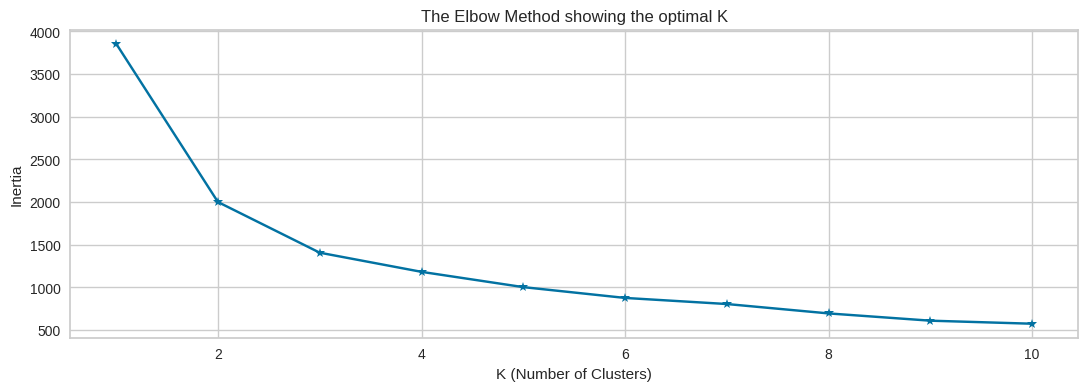

In [352]:
# Define canvas
plt.figure(figsize=(13,4))

# Let's plot the lineplot using matplotlib
# x-axis -> K_range, y-axis -> inertia
# "b*-" in the third parameter to do styling (b: blue, *: star mark in each point, -: connect by line)
# Ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html (bagian marker)
plt.plot(K_range, inertia, 'b*-')

plt.xlabel('K (Number of Clusters)')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal K');

### Silhouette Method

For k=2, the average silhouette score is 0.42391680004854104
For k=3, the average silhouette score is 0.3941905403238541
For k=4, the average silhouette score is 0.39850383748794455
For k=5, the average silhouette score is 0.37422824362485757
For k=6, the average silhouette score is 0.34637771648551063
For k=7, the average silhouette score is 0.3079953731152407
For k=8, the average silhouette score is 0.3305628149787634
For k=9, the average silhouette score is 0.337223225401333
For k=10, the average silhouette score is 0.3340925492430707


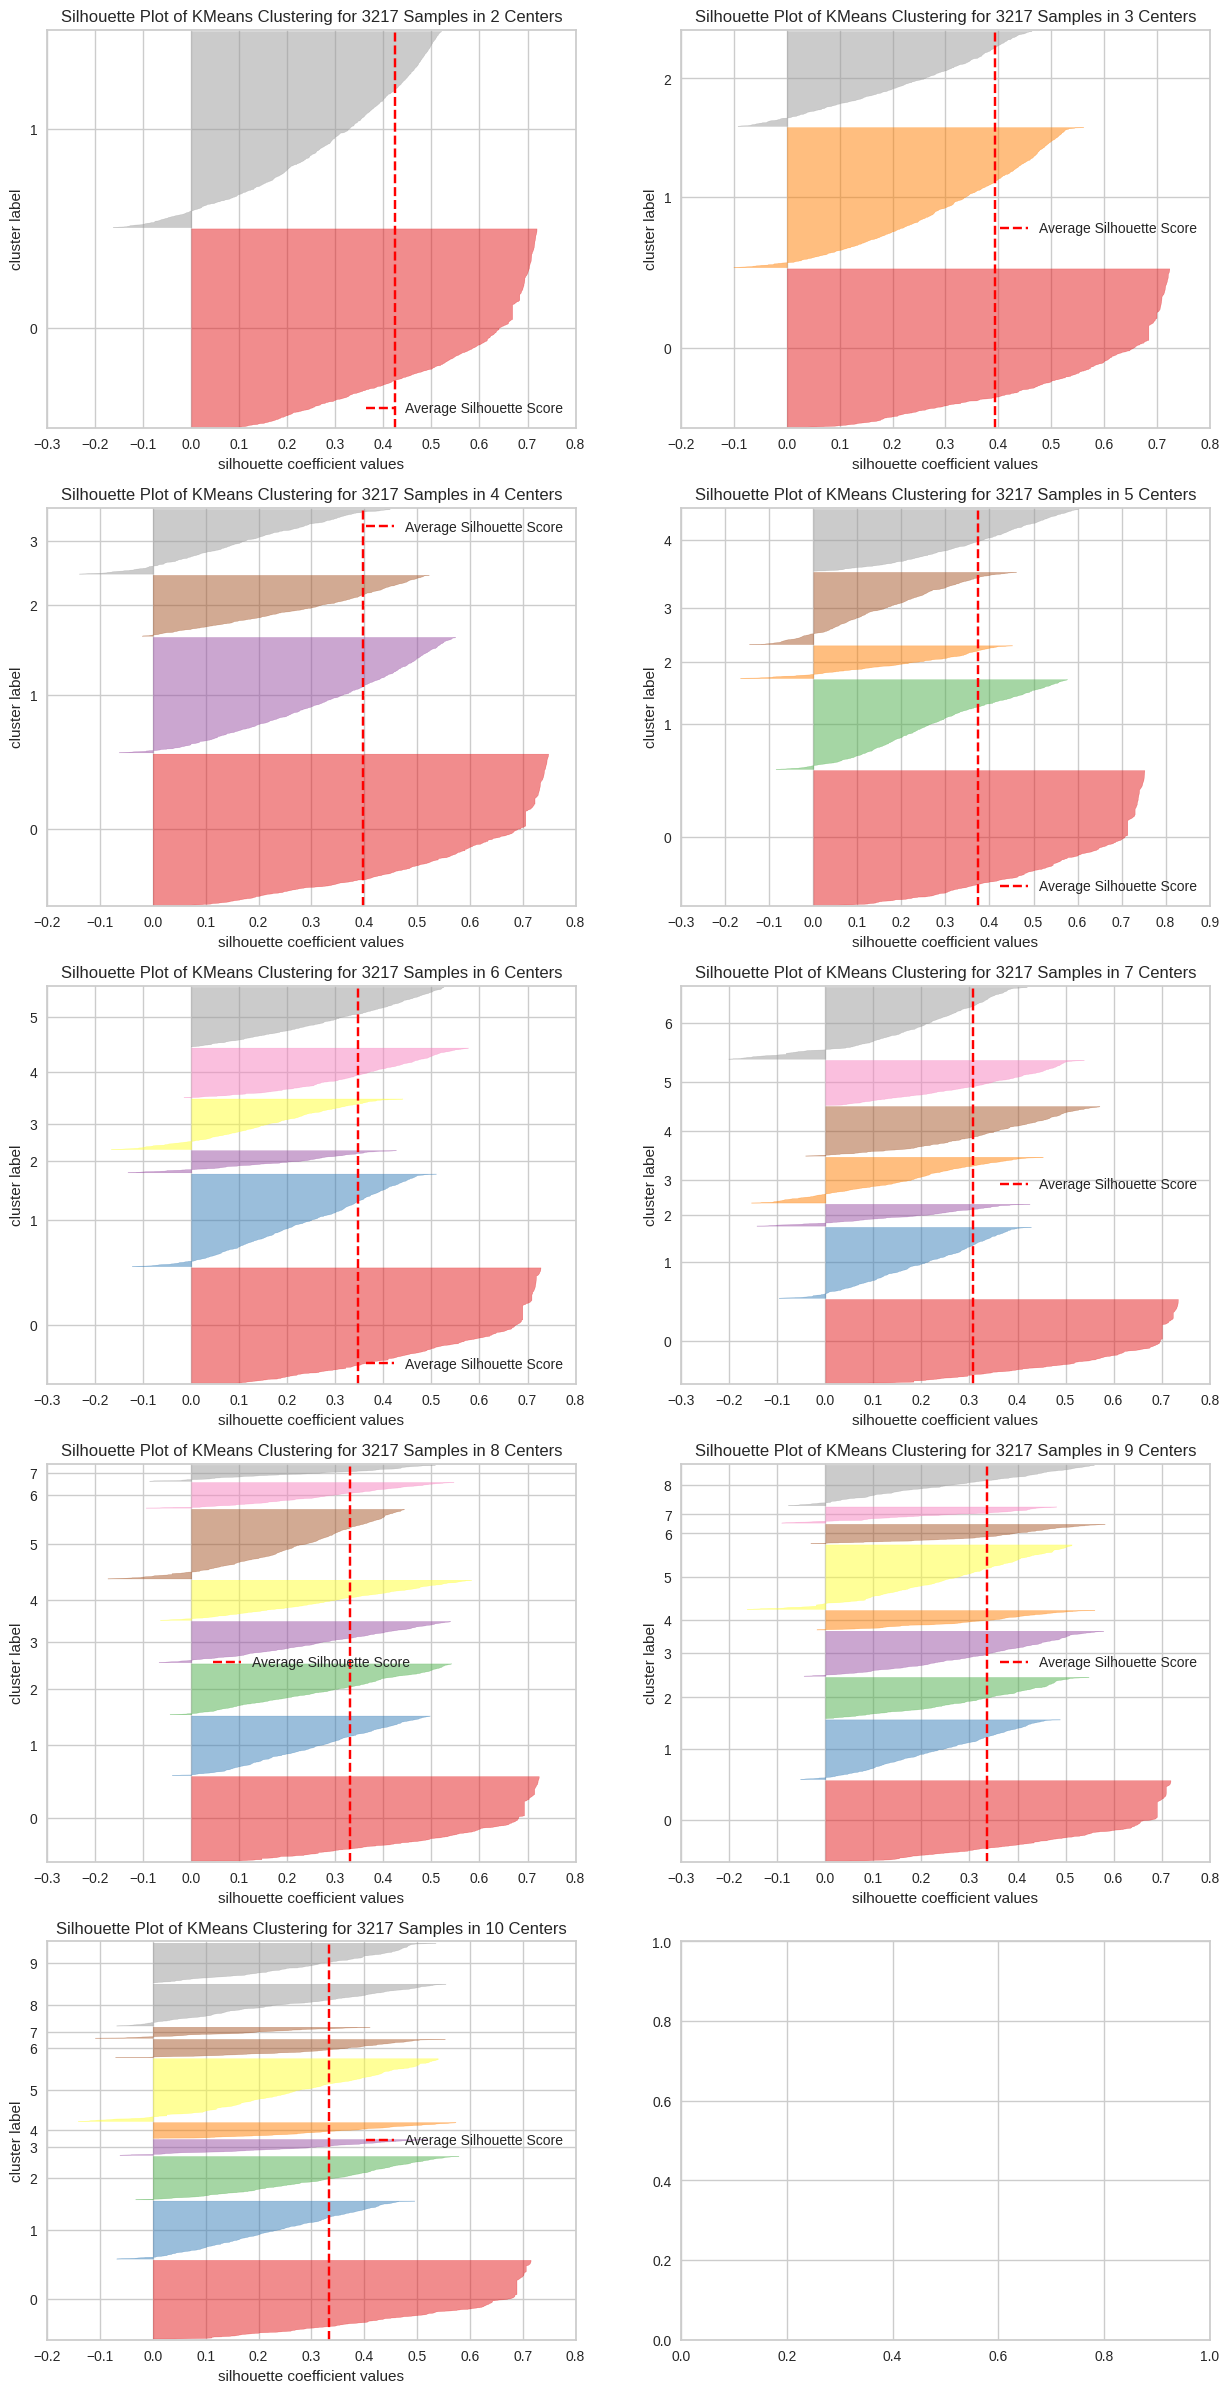

In [353]:
# Kita akan show tiap visualisasi lewat subplot dengan 2 kolom dan N baris
# N menyesuaikan berapa banyak range K yang kita pilih.
# Misal K-nya 11 biji, kita bikin subplots 6x2
# Kalau K-nya 12, maka bikin subplots tetep 6x2. (Rumusnya banyak K dibagi 2, lalu dibulatkan ke atas)

# Lakukan hal yang sama untuk setiap K_range 2-10
K_range = range(2,11)

# Hitung banyak K yang akan diplot
banyak_K = len(K_range)
# Dibagi 2 dan dibulatkan ke atas pakai np.ceil() -- (jangan lupa ubah ke int)
n_baris = int(np.ceil(banyak_K/2))

# Define canvasnya
fig, ax = plt.subplots(n_baris, 2, figsize=(15,30))

# Karena kita akan show masing-masing plot di ax bersesuaian di subplot, kita harus tau indexnya
# Kita bisa pakai function enumerate() untuk ambil index dan elemen dari sequence tiap iterasi (see Appendix)
for index, K in enumerate(K_range):
  kmeanModel = KMeans(n_clusters=K, random_state=42, n_init='auto')

  # Untuk memasukkan tiap chart ke indexnya di subplot, kita mending .flatten()-kan dulu ax-nya
  # Sehingga indexnya akan berupa bilangan terurut (liat appendix)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted=False, ax=ax.flatten()[index])
  sil.fit(kmeans_elbow)
  sil.finalize()
  print(f"For k={K}, the average silhouette score is {sil.silhouette_score_}")

## Run the Cluster using Prefered k

k = 2

In [354]:
# Run using K=2
cluster_model = KMeans(n_clusters=2, random_state=42, n_init='auto')
cluster_model.fit(kmeans_elbow)

KMeans(n_clusters=2, random_state=42)

## Put the cluster to original data frame

In [355]:
# Copy the original dataframe to "kmeans_result" and put the cluster label there
kmeans_result = kmeans_var.copy()
kmeans_result['cluster'] = cluster_model.labels_
kmeans_result

,distance,dollar_cost_points_redeemed,active_membership_duration_months,cluster
0,25268,35,12.0,1
1,28031,108,15.0,1
2,23117,0,15.0,0
3,17165,46,8.0,0
4,29857,82,20.0,1
...,...,...,...,...
3541,16395,0,10.0,0
3542,17714,60,11.0,1
3545,34859,73,10.0,1
3546,19670,41,10.0,0


In [356]:
kmeans_result['cluster'].value_counts(normalize=True)

,proportion
cluster,
0,0.502953
1,0.497047


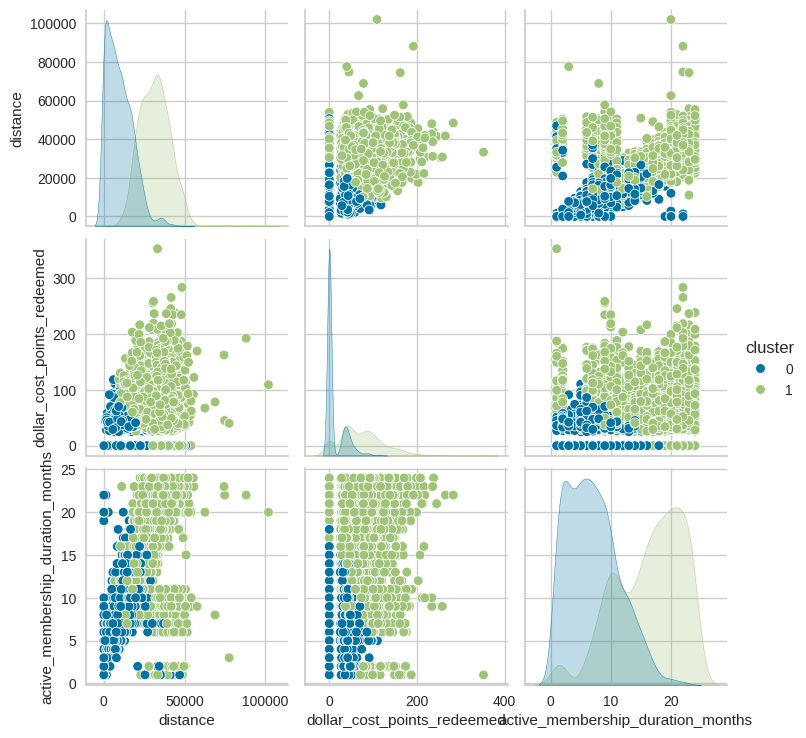

In [357]:
# Let's see the clusters created
sns.pairplot(kmeans_result, hue='cluster')

In [358]:
# Let's try to do grouping by the cluster created
kmeans_result.groupby('cluster').agg({
    'distance' : ['count', 'mean'],
    'dollar_cost_points_redeemed' : ['mean','median'],
    'active_membership_duration_months' : 'mean'
})

distance               dollar_cost_points_redeemed         \
           count          mean                        mean median   
cluster                                                             
0           1618   9718.566131                   11.204574    0.0   
1           1599  31589.318324                   73.133208   69.0   

        active_membership_duration_months  
                                     mean  
cluster                                    
0                                7.003090  
1                               16.321451

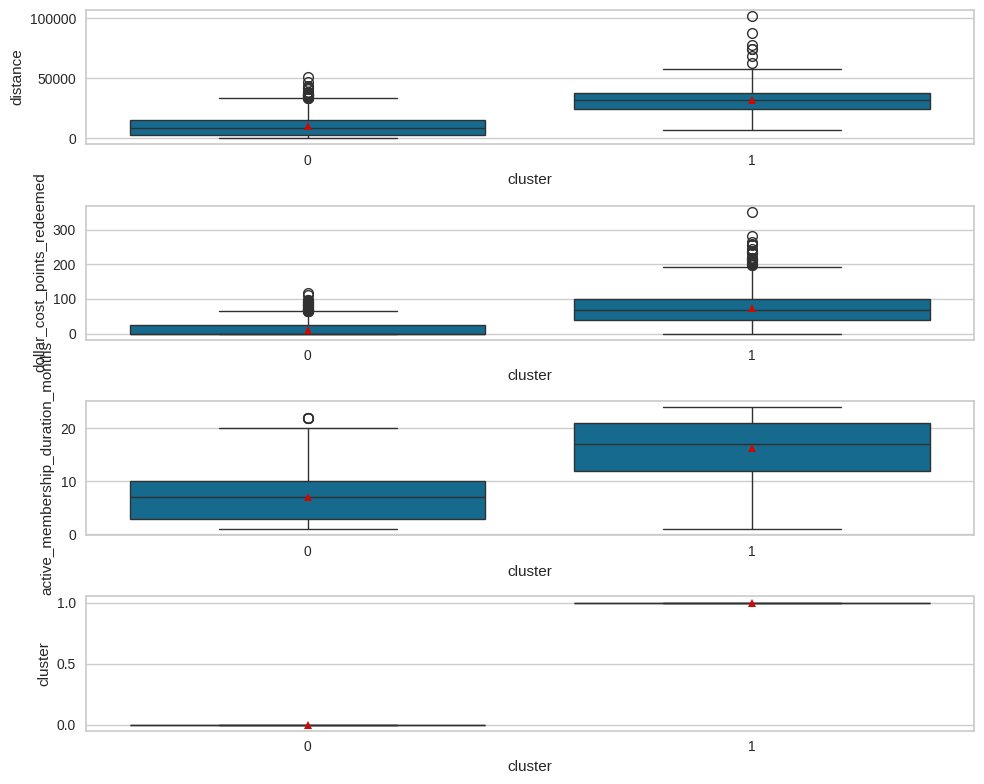

In [359]:
# Bisa juga melakukan boxplot

# Ambil banyak kolom dari data kita
n_baris = len(kmeans_result.columns)

# Buat canvas subplot dengan 1 kolom dan N baris sebanyak kolom numerik
fig, axes = plt.subplots(n_baris, 1, figsize=(10,8))

for i, nama_kol in enumerate(kmeans_result.columns):
  # Show boxplot bisa pakai library Seaborn, pilih datanya, x-axis, y-axis, axes, dan showmeans kalo mau show meannya
  sns.boxplot(kmeans_result, x='cluster', y=nama_kol, ax=axes.flatten()[i], showmeans=True)

plt.tight_layout()
plt.show()

k = 4

In [360]:
# Run using K=4
cluster_model = KMeans(n_clusters=4, random_state=42, n_init='auto')
cluster_model.fit(kmeans_elbow)

KMeans(n_clusters=4, random_state=42)

In [361]:
# Copy the original dataframe to "kmeans_result" and put the cluster label there
kmeans_result = kmeans_var.copy()
kmeans_result['cluster'] = cluster_model.labels_
kmeans_result

,distance,dollar_cost_points_redeemed,active_membership_duration_months,cluster
0,25268,35,12.0,1
1,28031,108,15.0,2
2,23117,0,15.0,1
3,17165,46,8.0,3
4,29857,82,20.0,2
...,...,...,...,...
3541,16395,0,10.0,0
3542,17714,60,11.0,3
3545,34859,73,10.0,3
3546,19670,41,10.0,3


In [362]:
kmeans_result['cluster'].value_counts(normalize=True)

,proportion
cluster,
0,0.385452
1,0.294374
3,0.165061
2,0.155113


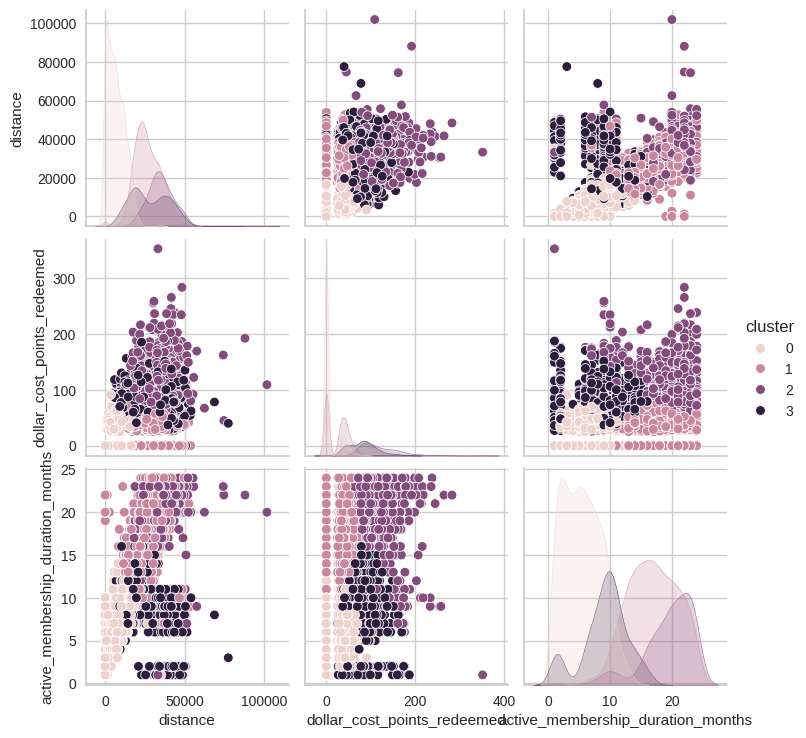

In [363]:
# Let's see the clusters created
sns.pairplot(kmeans_result, hue='cluster')

In [364]:
# Let's try to do grouping by the cluster created
kmeans_result.groupby('cluster').agg({
    'distance' : ['count', 'mean'],
    'dollar_cost_points_redeemed' : ['mean','median'],
    'active_membership_duration_months' : 'mean'
})

distance               dollar_cost_points_redeemed         \
           count          mean                        mean median   
cluster                                                             
0           1240   6752.991129                    8.233065    0.0   
1            947  26675.745512                   23.890180   30.0   
2            499  35328.675351                  118.767535  108.0   
3            531  28194.559322                   80.924670   81.0   

        active_membership_duration_months  
                                     mean  
cluster                                    
0                                5.494355  
1                               16.932418  
2                               19.484970  
3                                9.148776

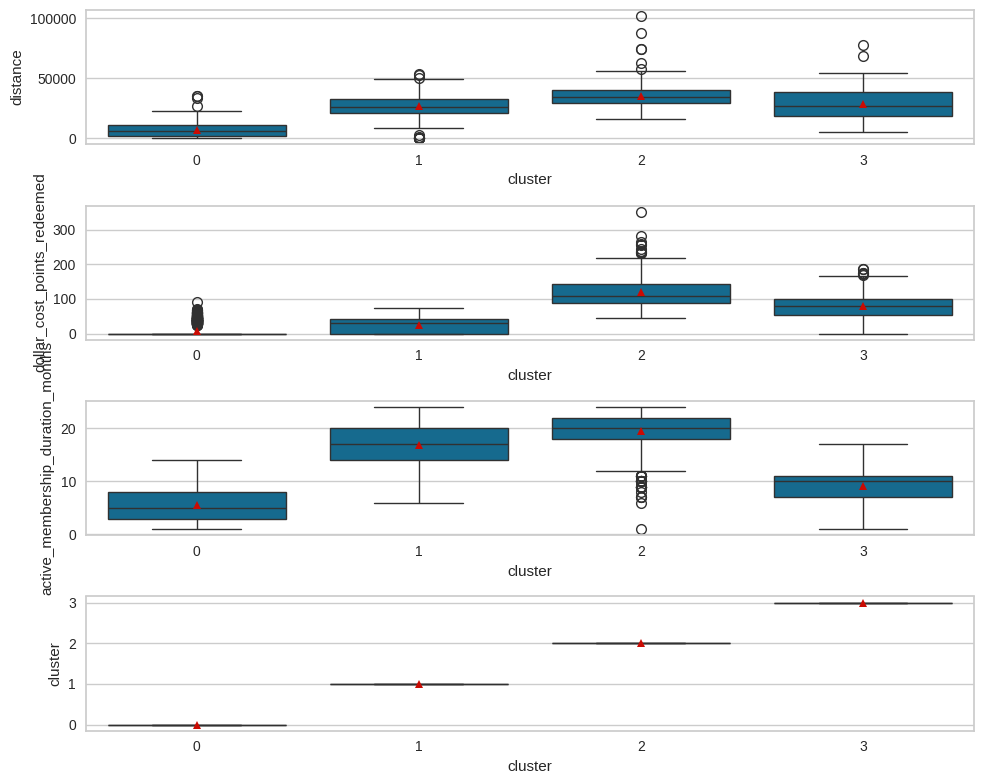

In [365]:
# Bisa juga melakukan boxplot

# Ambil banyak kolom dari data kita
n_baris = len(kmeans_result.columns)

# Buat canvas subplot dengan 1 kolom dan N baris sebanyak kolom numerik
fig, axes = plt.subplots(n_baris, 1, figsize=(10,8))

for i, nama_kol in enumerate(kmeans_result.columns):
  # Show boxplot bisa pakai library Seaborn, pilih datanya, x-axis, y-axis, axes, dan showmeans kalo mau show meannya
  sns.boxplot(kmeans_result, x='cluster', y=nama_kol, ax=axes.flatten()[i], showmeans=True)

plt.tight_layout()
plt.show()

How if we exclude those active loyalty membership who never travel with our airplane i.e., distance = 0?

In [366]:
kmeans_var

,distance,dollar_cost_points_redeemed,active_membership_duration_months
0,25268,35,12.0
1,28031,108,15.0
2,23117,0,15.0
3,17165,46,8.0
4,29857,82,20.0
...,...,...,...
3541,16395,0,10.0
3542,17714,60,11.0
3545,34859,73,10.0
3546,19670,41,10.0


In [367]:
kmeans_no_zero_distance = kmeans_var[kmeans_var['distance'] > 0 ]
kmeans_no_zero_distance

,distance,dollar_cost_points_redeemed,active_membership_duration_months
0,25268,35,12.0
1,28031,108,15.0
2,23117,0,15.0
3,17165,46,8.0
4,29857,82,20.0
...,...,...,...
3541,16395,0,10.0
3542,17714,60,11.0
3545,34859,73,10.0
3546,19670,41,10.0


In [368]:
kmeans_var[kmeans_var['distance'] < 0 ]

,distance,dollar_cost_points_redeemed,active_membership_duration_months


In [369]:
kmeans_no_zero_distance.describe()

,distance,dollar_cost_points_redeemed,active_membership_duration_months
count,2990.000000,2990.000000,2990.000000
mean,22152.494983,45.173579,12.268562
std,13368.613221,49.478454,6.526046
min,234.000000,0.000000,1.000000
25%,10928.000000,0.000000,7.000000
50%,21562.500000,37.000000,11.000000
75%,32677.000000,77.000000,18.000000
max,101959.000000,352.000000,24.000000


In [370]:
# RobustScaler()
robust_scaler = RobustScaler()
df_robust = pd.DataFrame(robust_scaler.fit_transform(kmeans_no_zero_distance), columns=kmeans_no_zero_distance.columns)
df_robust

,distance,dollar_cost_points_redeemed,active_membership_duration_months
0,0.170376,-0.025974,0.090909
1,0.297416,0.922078,0.363636
2,0.071475,-0.480519,0.363636
3,-0.202193,0.116883,-0.272727
4,0.381374,0.584416,0.818182
...,...,...,...
2985,-0.237597,-0.480519,-0.090909
2986,-0.176951,0.298701,0.000000
2987,0.611361,0.467532,-0.090909
2988,-0.087015,0.051948,-0.090909


In [371]:
kmeans_elbow = df_robust.copy()
kmeans_elbow

,distance,dollar_cost_points_redeemed,active_membership_duration_months
0,0.170376,-0.025974,0.090909
1,0.297416,0.922078,0.363636
2,0.071475,-0.480519,0.363636
3,-0.202193,0.116883,-0.272727
4,0.381374,0.584416,0.818182
...,...,...,...
2985,-0.237597,-0.480519,-0.090909
2986,-0.176951,0.298701,0.000000
2987,0.611361,0.467532,-0.090909
2988,-0.087015,0.051948,-0.090909


In [372]:
# But that's our inertia when K=3, so let's do this for all K from 2-10
# We need to train model for each "K". You guessed it, we use "FOR" iteration

# Create empty list to store the inertia value for each K later
inertia = []

# Why not start from 1? Karena tidak perlu membentuk dan mengukur 1 cluster saja
K_range = range(1,11)

for K in K_range:
  # Create the model
  kmeanModel = KMeans(n_clusters=K, random_state=42, n_init='auto')
  # Train them using "df_std" data (our final data scaled by standard scaler)
  kmeanModel.fit(kmeans_elbow)
  # Get the inertia value and put it in our empty list "inertia"
  inertia.append(kmeanModel.inertia_)
  print(f"jumlah cluster {K}: inertia: ",kmeanModel.inertia_)

# Print output
#inertia

jumlah cluster 1: inertia:  3415.563458144652
jumlah cluster 2: inertia:  1842.1907645727651
jumlah cluster 3: inertia:  1338.545132175289
jumlah cluster 4: inertia:  1124.6069897940793
jumlah cluster 5: inertia:  971.1094447944818
jumlah cluster 6: inertia:  800.0977567083437
jumlah cluster 7: inertia:  700.229066385458
jumlah cluster 8: inertia:  639.6628347609508
jumlah cluster 9: inertia:  581.6475770288233
jumlah cluster 10: inertia:  548.2988839453267


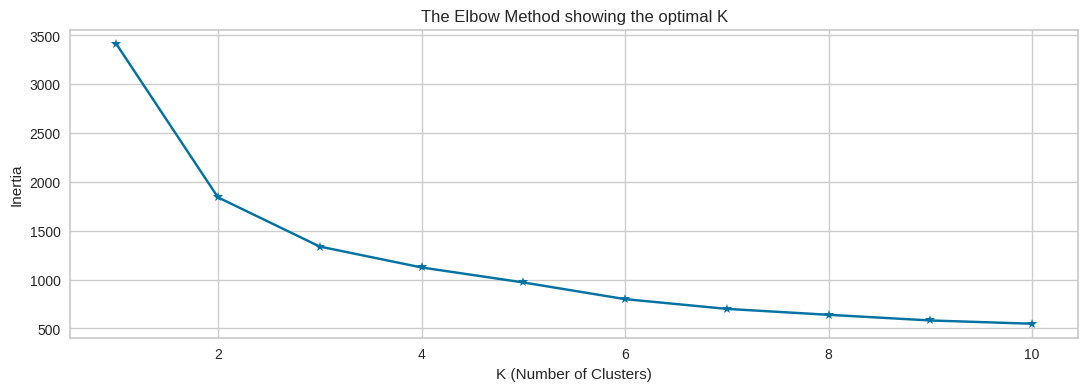

In [373]:
# Define canvas
plt.figure(figsize=(13,4))

# Let's plot the lineplot using matplotlib
# x-axis -> K_range, y-axis -> inertia
# "b*-" in the third parameter to do styling (b: blue, *: star mark in each point, -: connect by line)
# Ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html (bagian marker)
plt.plot(K_range, inertia, 'b*-')

plt.xlabel('K (Number of Clusters)')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal K');

For k=2, the average silhouette score is 0.4036611892195448
For k=3, the average silhouette score is 0.36958882692954115
For k=4, the average silhouette score is 0.32779261697699624
For k=5, the average silhouette score is 0.3467941596509131
For k=6, the average silhouette score is 0.36514704545281307
For k=7, the average silhouette score is 0.3503426620822547
For k=8, the average silhouette score is 0.3446345016325191
For k=9, the average silhouette score is 0.3427096151883919
For k=10, the average silhouette score is 0.34075789415435187


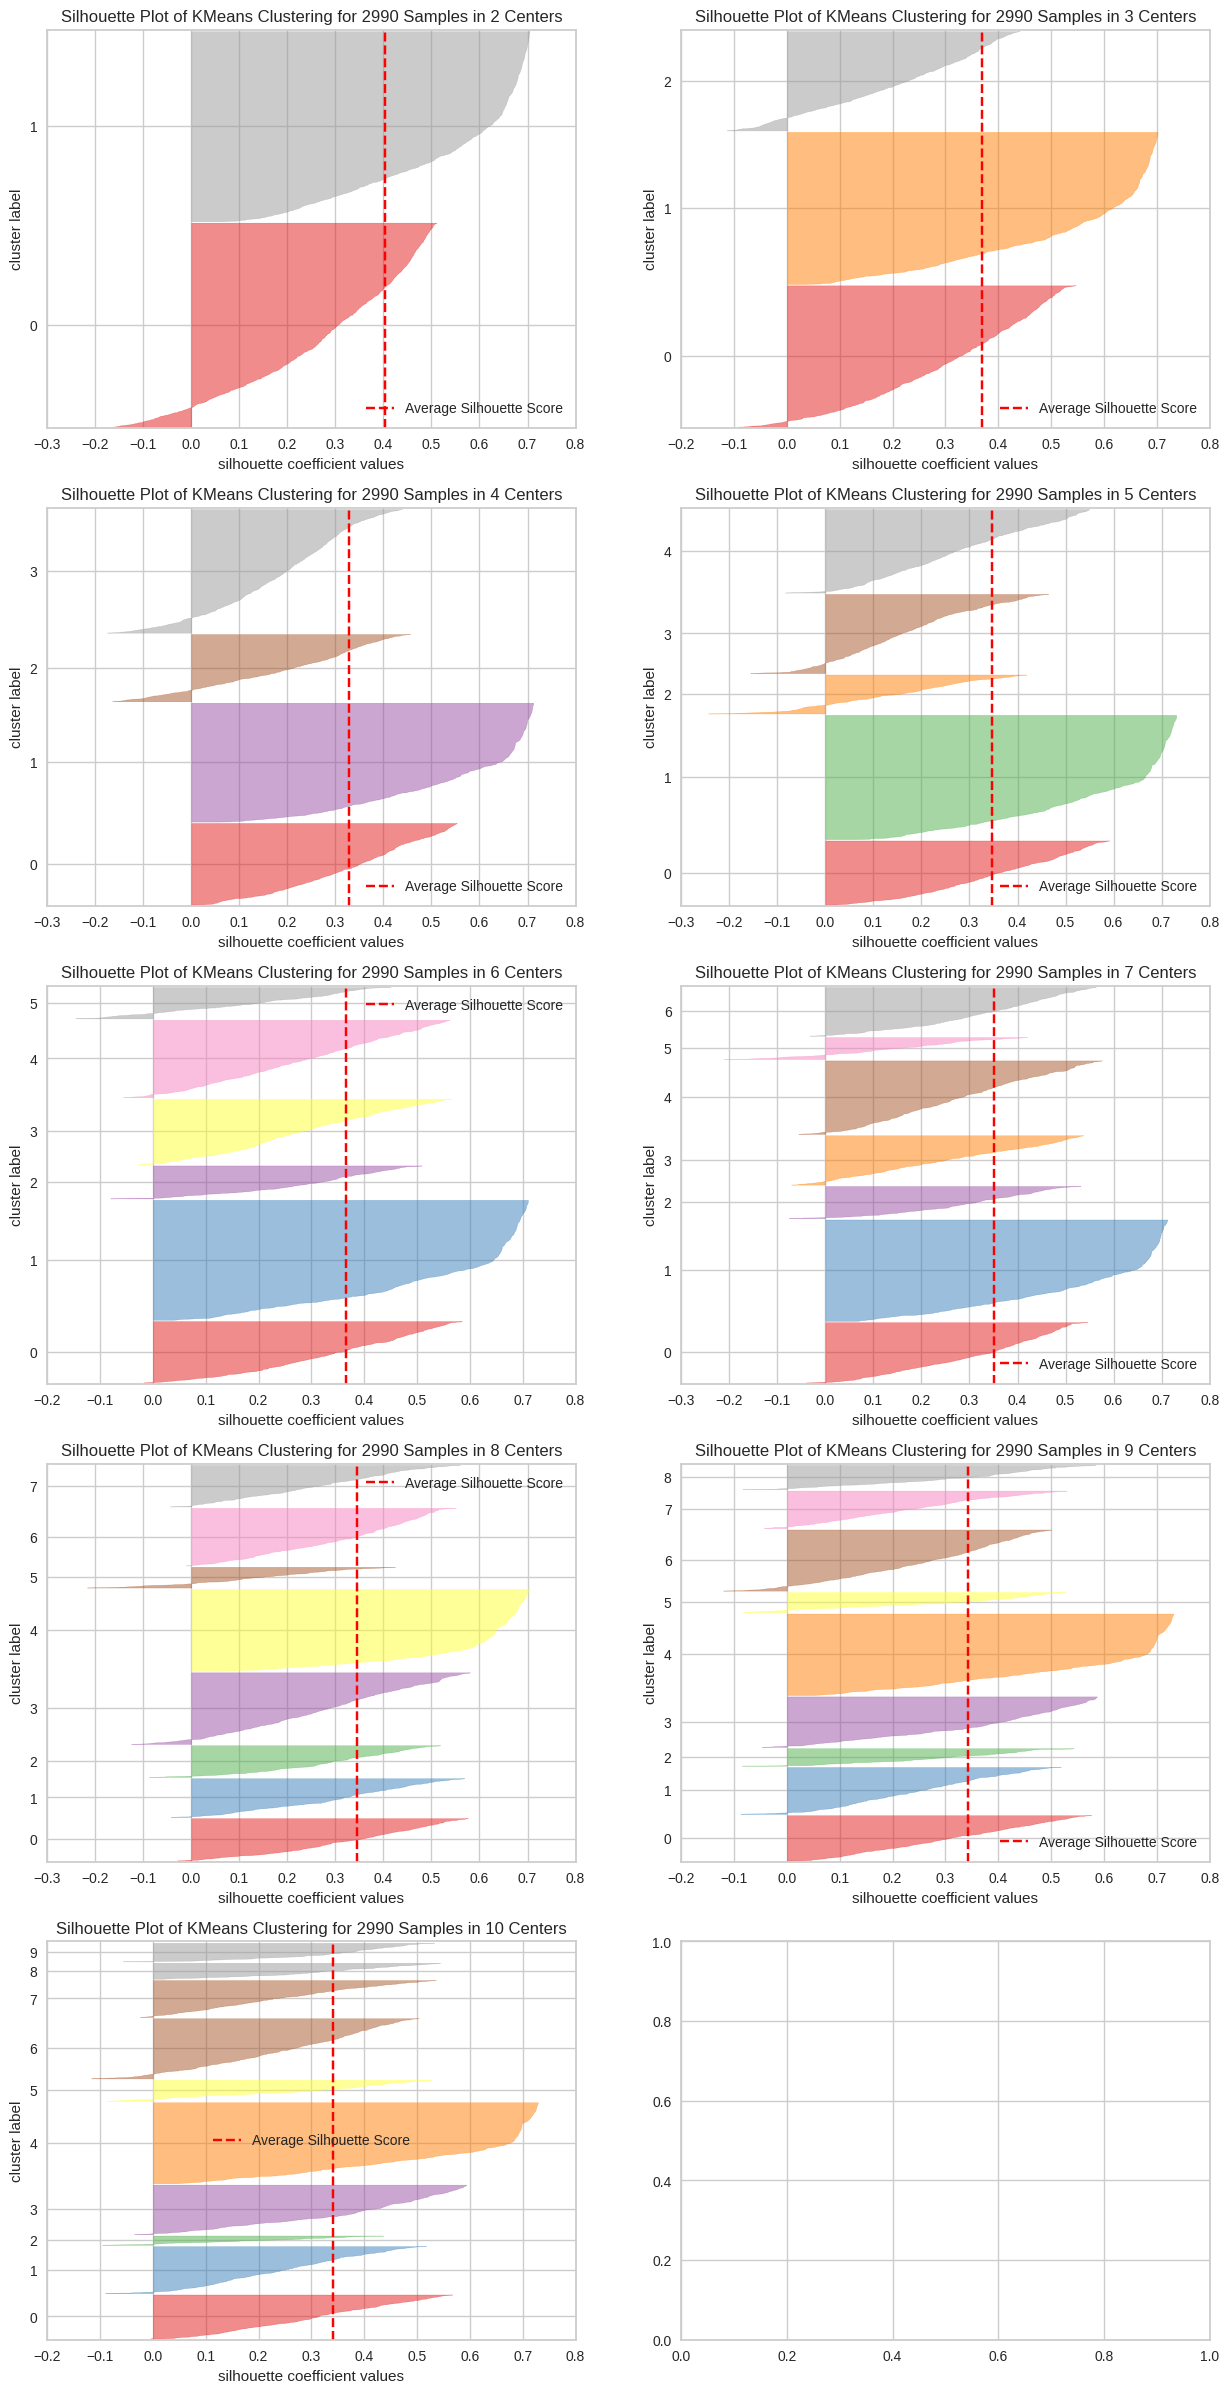

In [374]:
# Kita akan show tiap visualisasi lewat subplot dengan 2 kolom dan N baris
# N menyesuaikan berapa banyak range K yang kita pilih.
# Misal K-nya 11 biji, kita bikin subplots 6x2
# Kalau K-nya 12, maka bikin subplots tetep 6x2. (Rumusnya banyak K dibagi 2, lalu dibulatkan ke atas)

# Lakukan hal yang sama untuk setiap K_range 2-10
K_range = range(2,11)

# Hitung banyak K yang akan diplot
banyak_K = len(K_range)
# Dibagi 2 dan dibulatkan ke atas pakai np.ceil() -- (jangan lupa ubah ke int)
n_baris = int(np.ceil(banyak_K/2))

# Define canvasnya
fig, ax = plt.subplots(n_baris, 2, figsize=(15,30))

# Karena kita akan show masing-masing plot di ax bersesuaian di subplot, kita harus tau indexnya
# Kita bisa pakai function enumerate() untuk ambil index dan elemen dari sequence tiap iterasi (see Appendix)
for index, K in enumerate(K_range):
  kmeanModel = KMeans(n_clusters=K, random_state=42, n_init='auto')

  # Untuk memasukkan tiap chart ke indexnya di subplot, kita mending .flatten()-kan dulu ax-nya
  # Sehingga indexnya akan berupa bilangan terurut (liat appendix)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted=False, ax=ax.flatten()[index])
  sil.fit(kmeans_elbow)
  sil.finalize()
  print(f"For k={K}, the average silhouette score is {sil.silhouette_score_}")

In [375]:
# Run using K=2
cluster_model = KMeans(n_clusters=2, random_state=42, n_init='auto')
cluster_model.fit(kmeans_elbow)

KMeans(n_clusters=2, random_state=42)

In [376]:
# Copy the original dataframe to "kmeans_result" and put the cluster label there
kmeans_result2 = kmeans_no_zero_distance.copy()
kmeans_result2['cluster'] = cluster_model.labels_
kmeans_result2

,distance,dollar_cost_points_redeemed,active_membership_duration_months,cluster
0,25268,35,12.0,0
1,28031,108,15.0,0
2,23117,0,15.0,1
3,17165,46,8.0,1
4,29857,82,20.0,0
...,...,...,...,...
3541,16395,0,10.0,1
3542,17714,60,11.0,1
3545,34859,73,10.0,0
3546,19670,41,10.0,1


In [377]:
kmeans_result2['cluster'].value_counts(normalize=True)

,proportion
cluster,
0,0.517726
1,0.482274


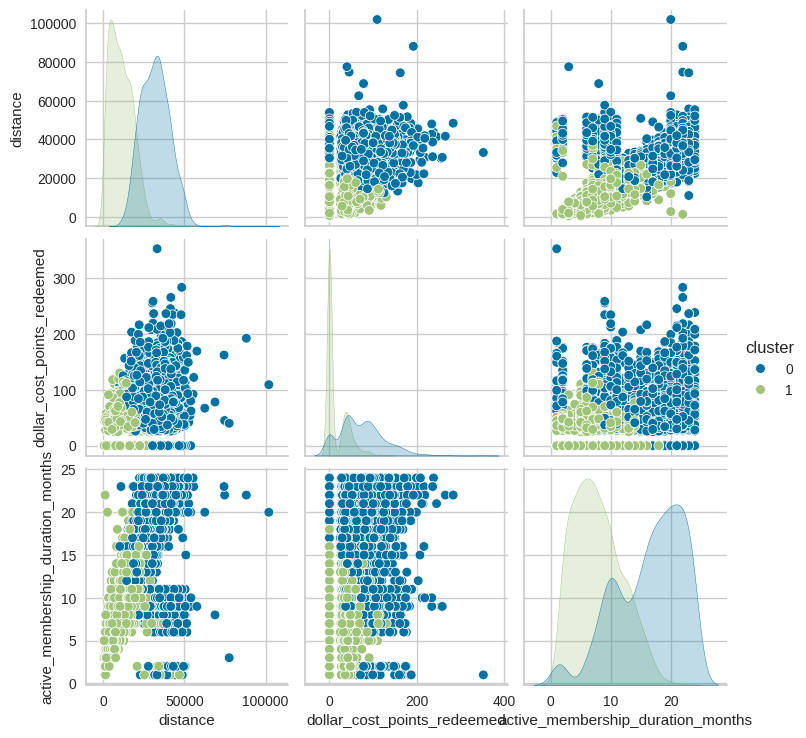

In [378]:
# Let's see the clusters created
sns.pairplot(kmeans_result2, hue='cluster')

In [379]:
# Let's try to do grouping by the cluster created
kmeans_result2.groupby('cluster').agg({
    'distance' : ['count', 'mean','min','max'],
    'dollar_cost_points_redeemed' : ['mean','median','min','max'],
    'active_membership_duration_months' : 'mean'
})

distance                              dollar_cost_points_redeemed  \
           count          mean    min     max                        mean   
cluster                                                                     
0           1548  32156.357235  10127  101959                   73.407623   
1           1442  11413.258669    234   46976                   14.864078   

                        active_membership_duration_months  
        median min  max                              mean  
cluster                                                    
0         70.0   0  352                         16.445090  
1          0.0   0  130                          7.785021

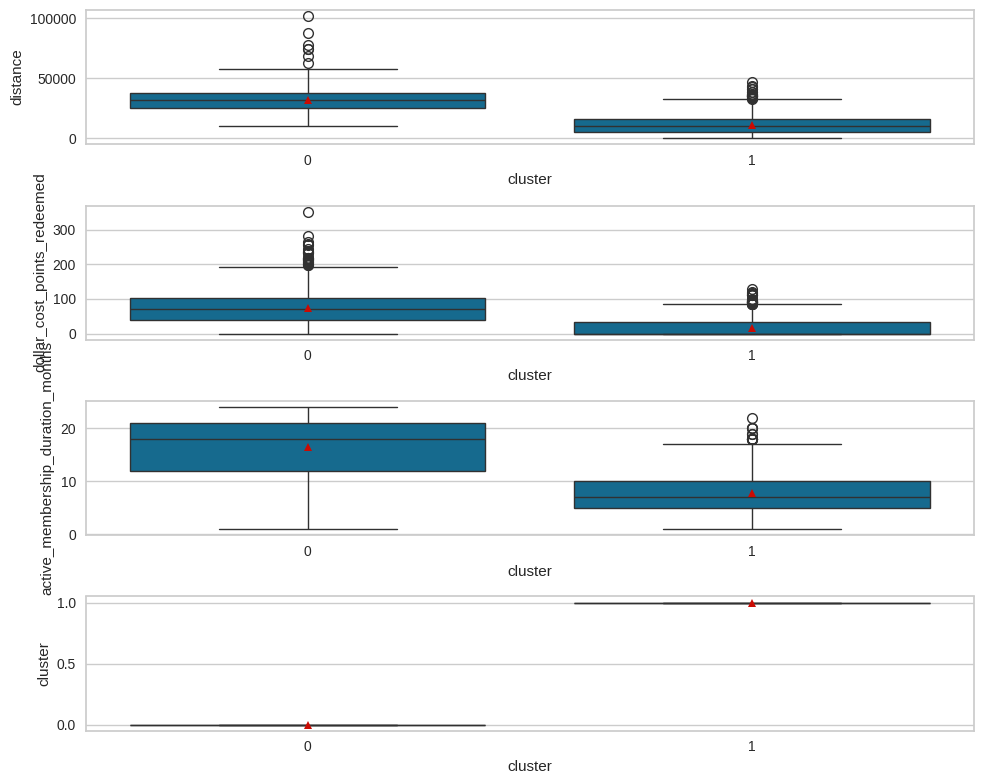

In [380]:
# Bisa juga melakukan boxplot

# Ambil banyak kolom dari data kita
n_baris = len(kmeans_result2.columns)

# Buat canvas subplot dengan 1 kolom dan N baris sebanyak kolom numerik
fig, axes = plt.subplots(n_baris, 1, figsize=(10,8))

for i, nama_kol in enumerate(kmeans_result2.columns):
  # Show boxplot bisa pakai library Seaborn, pilih datanya, x-axis, y-axis, axes, dan showmeans kalo mau show meannya
  sns.boxplot(kmeans_result2, x='cluster', y=nama_kol, ax=axes.flatten()[i], showmeans=True)

plt.tight_layout()
plt.show()

# Cluster Interpretation

Interpretation:
- Cluster 0: long-term member, higher point redeemed, long distance travel
- Cluster 1: new member, lower point redeemed, short distance travel

# Add the cluster column from kmeans_result2 to the original loyalty dataframe. It should be only 2990 customers with label. The reason: we dont include those with distance = 0

In [381]:
kmeans_result2

,distance,dollar_cost_points_redeemed,active_membership_duration_months,cluster
0,25268,35,12.0,0
1,28031,108,15.0,0
2,23117,0,15.0,1
3,17165,46,8.0,1
4,29857,82,20.0,0
...,...,...,...,...
3541,16395,0,10.0,1
3542,17714,60,11.0,1
3545,34859,73,10.0,0
3546,19670,41,10.0,1


In [382]:
df_loyalty

,loyalty_number,country,province,city,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_date,cancellation_date,active_membership_duration_months,year,status
0,611765,Canada,Quebec,Quebec City,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018-01-01,NaT,12.0,2018,Active
1,557752,Canada,Ontario,Toronto,Female,Bachelor,98629.0,Married,Star,3890.87,Standard,2017-10-01,NaT,15.0,2017,Active
2,403361,Canada,British Columbia,Vancouver,Male,Bachelor,70222.0,Single,Star,3895.03,Standard,2017-10-01,NaT,15.0,2017,Active
3,806030,Canada,Alberta,Calgary,Female,Bachelor,75861.0,Married,Star,3903.47,Standard,2018-05-01,NaT,8.0,2018,Active
4,119200,Canada,British Columbia,Vancouver,Female,Bachelor,69835.0,Divorced,Star,3903.80,Standard,2017-05-01,NaT,20.0,2017,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,389583,Canada,Yukon,Whitehorse,Female,Bachelor,59220.0,Divorced,Nova,5283.36,2018 Promotion,2018-03-01,NaT,10.0,2018,Active
3546,847601,Canada,Yukon,Whitehorse,Male,Bachelor,82383.0,Divorced,Nova,7736.65,2018 Promotion,2018-03-01,NaT,10.0,2018,Active
3547,368435,Canada,Yukon,Whitehorse,Female,Bachelor,73695.0,Married,Nova,8707.62,2018 Promotion,2018-04-01,2018-12-01,NaN,2018,Churned
3548,828109,Canada,Yukon,Whitehorse,Female,Bachelor,74049.0,Divorced,Nova,13009.24,2018 Promotion,2018-03-01,2018-11-01,NaN,2018,Churned


In [383]:
df_loyalty2 = df_loyalty.copy()
df_loyalty2

,loyalty_number,country,province,city,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_date,cancellation_date,active_membership_duration_months,year,status
0,611765,Canada,Quebec,Quebec City,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018-01-01,NaT,12.0,2018,Active
1,557752,Canada,Ontario,Toronto,Female,Bachelor,98629.0,Married,Star,3890.87,Standard,2017-10-01,NaT,15.0,2017,Active
2,403361,Canada,British Columbia,Vancouver,Male,Bachelor,70222.0,Single,Star,3895.03,Standard,2017-10-01,NaT,15.0,2017,Active
3,806030,Canada,Alberta,Calgary,Female,Bachelor,75861.0,Married,Star,3903.47,Standard,2018-05-01,NaT,8.0,2018,Active
4,119200,Canada,British Columbia,Vancouver,Female,Bachelor,69835.0,Divorced,Star,3903.80,Standard,2017-05-01,NaT,20.0,2017,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,389583,Canada,Yukon,Whitehorse,Female,Bachelor,59220.0,Divorced,Nova,5283.36,2018 Promotion,2018-03-01,NaT,10.0,2018,Active
3546,847601,Canada,Yukon,Whitehorse,Male,Bachelor,82383.0,Divorced,Nova,7736.65,2018 Promotion,2018-03-01,NaT,10.0,2018,Active
3547,368435,Canada,Yukon,Whitehorse,Female,Bachelor,73695.0,Married,Nova,8707.62,2018 Promotion,2018-04-01,2018-12-01,NaN,2018,Churned
3548,828109,Canada,Yukon,Whitehorse,Female,Bachelor,74049.0,Divorced,Nova,13009.24,2018 Promotion,2018-03-01,2018-11-01,NaN,2018,Churned


In [384]:
df_loyalty2['cluster'] = kmeans_result2['cluster']
df_loyalty2

,loyalty_number,country,province,city,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_date,cancellation_date,active_membership_duration_months,year,status,cluster
0,611765,Canada,Quebec,Quebec City,Male,Bachelor,90175.0,Single,Star,3867.97,Standard,2018-01-01,NaT,12.0,2018,Active,0.0
1,557752,Canada,Ontario,Toronto,Female,Bachelor,98629.0,Married,Star,3890.87,Standard,2017-10-01,NaT,15.0,2017,Active,0.0
2,403361,Canada,British Columbia,Vancouver,Male,Bachelor,70222.0,Single,Star,3895.03,Standard,2017-10-01,NaT,15.0,2017,Active,1.0
3,806030,Canada,Alberta,Calgary,Female,Bachelor,75861.0,Married,Star,3903.47,Standard,2018-05-01,NaT,8.0,2018,Active,1.0
4,119200,Canada,British Columbia,Vancouver,Female,Bachelor,69835.0,Divorced,Star,3903.80,Standard,2017-05-01,NaT,20.0,2017,Active,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,389583,Canada,Yukon,Whitehorse,Female,Bachelor,59220.0,Divorced,Nova,5283.36,2018 Promotion,2018-03-01,NaT,10.0,2018,Active,0.0
3546,847601,Canada,Yukon,Whitehorse,Male,Bachelor,82383.0,Divorced,Nova,7736.65,2018 Promotion,2018-03-01,NaT,10.0,2018,Active,1.0
3547,368435,Canada,Yukon,Whitehorse,Female,Bachelor,73695.0,Married,Nova,8707.62,2018 Promotion,2018-04-01,2018-12-01,NaN,2018,Churned,NaN
3548,828109,Canada,Yukon,Whitehorse,Female,Bachelor,74049.0,Divorced,Nova,13009.24,2018 Promotion,2018-03-01,2018-11-01,NaN,2018,Churned,NaN


In [385]:
df_loyalty2.to_csv('df_loyalty2.csv', index=False)

# Third Merging

Merging the loyalty data frame with cluster and the customers' flight history

In [386]:
df_merge3_with_cluster = pd.merge(df_loyalty2, customer_flight_history, how='left', on='loyalty_number')
df_merge3_with_cluster.shape

(3550, 24)

In [387]:
df_merge3_with_cluster.to_csv('df_merge3_with_cluster.csv')

# End of File